<a href="https://colab.research.google.com/github/stefanomarchitto/Module-1/blob/main/Budget_UseCase_Module_4_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

import os
import glob

import shutil
import sys
from pathlib import Path

import datetime

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from openpyxl import load_workbook # necesserry library

# utility functions for cells locations
!pip install xlsxwriter  # uncomment if necessary
import xlsxwriter
from xlsxwriter.utility import xl_rowcol_to_cell
from xlsxwriter.utility import xl_col_to_name
from xlsxwriter.utility import xl_range, xl_range_abs
from openpyxl.utils import get_column_letter, column_index_from_string


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.8/152.8 KB 3.9 MB/s eta 0:00:00


In [2]:
# set visible all columns
pd.set_option('display.max_columns', None)

# 1.&nbsp;Settings

## Drive and cwd

In [3]:
# Accessing Google Drive from Google Colab

from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
# assing current working directory (`cwd`)
cwd = os.getcwd()
cwd

'/content'

In [5]:
# containing of /content directory
os.listdir()

['.config', 'gdrive', 'sample_data']

## Import Files

In [6]:
# import files into google Colab
from google.colab import files

In [7]:
# upload from your local : images folder .png from your downloads
uploaded = files.upload()

Saving Budget_raw.xlsx to Budget_raw.xlsx


In [8]:
# containing of /content directory, see if images were uploaded
os.listdir()

['.config', 'Budget_raw.xlsx', 'gdrive', 'sample_data']

## Module_4 folder

In [9]:
# uncoment if you want to reinitilize Module_4

# delete folder Model_4 with all containing
shutil.rmtree('/content/gdrive/MyDrive/Module_4')

In [10]:
# create a floder Module_4 where you'll store files

# create a new folder called "Module_4"

# First: 
# write the path to the "Module_4" sub_directory
folder = cwd + '/' + 'gdrive/MyDrive/Module_4/images' # == > /content/gdrive/MyDrive/Module_4/images
print(folder)

# Second:
# create the folder at the indicated path
os.makedirs(folder) # create an empty folder, if you're getting an error [Errno 17] File exists, then delete it with shutil.rmtree
# if you're getting an error of File exist, then uncoment previous cell with command shutil.rmtree('/content/gdrive/MyDrive/Module_4')

/content/gdrive/MyDrive/Module_4/images


In [11]:
# check files in Module_4 directory
os.listdir('/content/gdrive/MyDrive/Module_4')

['images']

In [12]:
# containing of folder images
os.listdir('/content/gdrive/MyDrive/Module_4/images')

[]

In [13]:
# select all .png and move them to folder Module_3/Images

# searchin for all files with extention .png
# and store the into a list png_files

png_files=[]
for file in os.listdir():
    if file.endswith('.png'): # or '.csv' if your'looinkg for csv files
            png_files.append(file)
            
# it will print out excel names present in current directory folder = 'Basics_Python"
print( 'there are', len(png_files), "png files ")
print(png_files[:4])

there are 0 png files 
[]


In [14]:
# move all images into folder MOdule_4/Images

folder = '/content/gdrive/MyDrive/Module_4/images'

for image in png_files:
  shutil.move(image, # file/folder to cut
              folder) # folder where to move 

In [18]:
# check if images were moved from cwd
os.listdir()

['.config', 'Budget_raw.xlsx', 'gdrive', 'sample_data']

In [17]:
# in case some specific .PNG remained

# shutil.move('img_1.PNG', # file/folder to cut
              folder) # folder where to move 
# os.listdir()

IndentationError: ignored

In [19]:
# check files in Module_4
os.listdir('gdrive/MyDrive/Module_4')

['images']

In [20]:
# check files present in Module_4/Images, all the images were transfered to Module_4/images
os.listdir('/content/gdrive/MyDrive/Module_4/images')

[]

In [21]:
# change cwd to Module_4
os.chdir('gdrive/MyDrive/Module_4')
# check the new current working directory now
cwd = os.getcwd()
cwd # folder MOdule_3 will be from now on our cwd

'/content/gdrive/MyDrive/Module_4'

In [22]:
# upload from your local : 'Budget_raw.xlsx'
uploaded = files.upload()

Saving Budget_raw.xlsx to Budget_raw.xlsx


In [23]:
# check if Budget_raw.xlsx is on cwd ==> Module_4
os.listdir()

['images', 'Budget_raw.xlsx']

In [24]:
os.listdir('/content/gdrive/MyDrive/Colab Notebooks')


['Test.ipynb',
 'Copy of Test.ipynb',
 'Untitled',
 'Python_Basics_Module_1 (1).ipynb',
 'Python_Basics_Module_1_Practice.ipynb',
 'Copy of Python_Basics_Module_1_Practice.ipynb',
 'Python_Basics_Module_1.ipynb',
 'Files_Manipulation_Module_2 (1).ipynb',
 'Python_Basics_Module_1_Practice_2 (2).ipynb',
 'Python_Basics_Module_1_Practice_2 (1).ipynb',
 'Files_Manipulation_Module_2.ipynb',
 'Python_Basics_Module_1_Practice_2.ipynb',
 'Excel_processing_Basics_Colab_Module_3_backup (3).ipynb',
 'Excel_processing_Basics_Colab_Module_3_backup (2).ipynb',
 'Excel_processing_Basics_Colab_Module_3_backup (1).ipynb',
 'Excel_processing_Basics_Colab_Module_3_backup.ipynb',
 'Budget_UseCase_Module_4 (1).ipynb',
 'Budget_UseCase_Module_4.ipynb',
 'Budget_UseCase_Module_4_v2.ipynb']

In [25]:
# check the notebook in your Colab Notebooks

# if you want to delete a specific notebook in your drive, uncomment
#os.unlink('/content/gdrive/MyDrive/Colab Notebooks/Budget_UseCase_Module_4.ipynb')
#os.unlink('/content/gdrive/MyDrive/Colab Notebooks/Copy of Budget_UseCase_Module_4 (1).ipynb')
#os.unlink('/content/gdrive/MyDrive/Colab Notebooks/Copy of Budget_UseCase_Module_4 (2).ipynb')
#os.unlink('/content/gdrive/MyDrive/Colab Notebooks/Copy of Budget_UseCase_Module_4 (3).ipynb')

# check again the files in Colab Notebooks
os.listdir('/content/gdrive/MyDrive/Colab Notebooks')

['Test.ipynb',
 'Copy of Test.ipynb',
 'Untitled',
 'Python_Basics_Module_1 (1).ipynb',
 'Python_Basics_Module_1_Practice.ipynb',
 'Copy of Python_Basics_Module_1_Practice.ipynb',
 'Python_Basics_Module_1.ipynb',
 'Files_Manipulation_Module_2 (1).ipynb',
 'Python_Basics_Module_1_Practice_2 (2).ipynb',
 'Python_Basics_Module_1_Practice_2 (1).ipynb',
 'Files_Manipulation_Module_2.ipynb',
 'Python_Basics_Module_1_Practice_2.ipynb',
 'Excel_processing_Basics_Colab_Module_3_backup (3).ipynb',
 'Excel_processing_Basics_Colab_Module_3_backup (2).ipynb',
 'Excel_processing_Basics_Colab_Module_3_backup (1).ipynb',
 'Excel_processing_Basics_Colab_Module_3_backup.ipynb',
 'Budget_UseCase_Module_4 (1).ipynb',
 'Budget_UseCase_Module_4.ipynb',
 'Budget_UseCase_Module_4_v2.ipynb']

In [26]:
# if you save it in Drive and it was saved as a copy then rename it 

# rename
'''
os.rename('/content/gdrive/MyDrive/Colab Notebooks/Copy of Budget_UseCase_Module_4.ipynb', 
          '/content/gdrive/MyDrive/Colab Notebooks/Budget_UseCase_Module_4.ipynb') 

'''

# check again the files in Colab Notebooks
os.listdir('/content/gdrive/MyDrive/Colab Notebooks')

['Test.ipynb',
 'Copy of Test.ipynb',
 'Untitled',
 'Python_Basics_Module_1 (1).ipynb',
 'Python_Basics_Module_1_Practice.ipynb',
 'Copy of Python_Basics_Module_1_Practice.ipynb',
 'Python_Basics_Module_1.ipynb',
 'Files_Manipulation_Module_2 (1).ipynb',
 'Python_Basics_Module_1_Practice_2 (2).ipynb',
 'Python_Basics_Module_1_Practice_2 (1).ipynb',
 'Files_Manipulation_Module_2.ipynb',
 'Python_Basics_Module_1_Practice_2.ipynb',
 'Excel_processing_Basics_Colab_Module_3_backup (3).ipynb',
 'Excel_processing_Basics_Colab_Module_3_backup (2).ipynb',
 'Excel_processing_Basics_Colab_Module_3_backup (1).ipynb',
 'Excel_processing_Basics_Colab_Module_3_backup.ipynb',
 'Budget_UseCase_Module_4 (1).ipynb',
 'Budget_UseCase_Module_4.ipynb',
 'Budget_UseCase_Module_4_v2.ipynb']

In [27]:
# check if you have the latest version of notebook
# get the time of file creation/modification

import time
 
# Path to the file/directory
path = "/content/gdrive/MyDrive/Colab Notebooks/Budget_UseCase_Module_4.ipynb"
# path = "Budget_UseCase_Module_4.ipynb" # from cwd
 
# Both the variables would contain time

ti_c = os.path.getctime(path) # time of creation
ti_m = os.path.getmtime(path) # time of modification


# Converting the time in seconds to a timestamp
c_ti = time.ctime(ti_c)
m_ti = time.ctime(ti_m)
 
print(f"The file located at the path {path} \
was created at {c_ti} and was "
      f"last modified at {m_ti}")

The file located at the path /content/gdrive/MyDrive/Colab Notebooks/Budget_UseCase_Module_4.ipynb was created at Wed Mar 15 11:53:44 2023 and was last modified at Wed Mar 15 11:53:44 2023


In [28]:
# copy notebook "Excel_processing_Basics_Colab_Module_4" in your cwd MOdule_4

folder = '/content/gdrive/MyDrive/Module_4' # path to were to move
notebook = '/content/gdrive/MyDrive/Colab Notebooks/Budget_UseCase_Module_4.ipynb' # path from the where to get the notebook

# copy (or move) from google colab to module_4, if you like to move ==> .move
shutil.copy(notebook, # file/folder to cut/copy
            folder) # folder where to move

'/content/gdrive/MyDrive/Module_4/Budget_UseCase_Module_4.ipynb'

In [29]:
#containing of cwd
os.listdir()

['images', 'Budget_raw.xlsx', 'Budget_UseCase_Module_4.ipynb']

In paralel, 



*   we will be working with *pandas* : for data operations, like summing, % change, group by... 
*   we will be working with *openpyxl* to write the modifications in excel: inserting/writing new columns at locations we want



# 2.&nbsp;DF pandas, read Excel

## Loading excel in DF

In [30]:
# read excel 'Budget_raw.xlsx' and load it in a dataframe

filename='Budget_raw.xlsx'
# read the excel
df = pd.read_excel(filename, 
                   header=0) # the row 0 will be as our headers
df = pd.DataFrame(df)
# df = df.set_index(['Region', 'Business', 'Department'])

# display first 8 rows
df.head(8)

,Business,Department,Region,Jan Income,Feb Income,Mar Income,Apr Income,May Income,Jun Income,Jan Expenditure,Feb Expenditure,Mar Expenditure,Apr Expenditure,May Expenditure,Jun Expenditure
0,B2C_1,Loans,AT,5924.95,4680.71,7406.19,7169.19,7406.19,5213.96,5178.13,3883.60,3534.08,4240.90,3731.99,4217.15
1,B2C_1,Loans,AT,5924.95,7346.94,6872.94,4739.96,6280.45,6576.69,3913.87,3835.59,4410.93,4058.06,4220.38,5064.46
2,B2C_1,Loans,AT,5924.95,7406.19,6043.45,6161.95,6161.95,5924.95,4386.71,3377.77,3411.55,3206.86,3399.27,3229.31
3,B2C_1,Services,AT,5924.95,5865.70,7406.19,4858.46,5984.20,7169.19,4840.73,4743.92,5692.70,5123.43,4867.26,5500.00
4,B2C_1,Loans,AT,5924.95,6280.45,6102.70,6339.70,5865.70,6458.20,5875.00,5698.75,5983.69,6701.73,7505.94,8481.71
5,B2C_1,Loans,AT,5867.90,7334.88,6102.62,4987.72,6043.94,6396.01,2229.34,2162.46,2551.70,2908.94,3112.57,3237.07
6,B2C_1,Loans,AT,5824.70,6814.90,6989.64,4543.27,6465.42,5649.96,2199.00,1737.21,2015.16,2115.92,1883.17,1977.33
7,B2C_1,Loans,AT,5924.95,5391.70,4976.96,7346.94,6102.70,5806.45,3924.12,3767.16,4068.53,3987.16,4505.49,3964.83


## Explore the DF

In [31]:
# dimensions and column names

print('df dimensions: ', df.shape)
print('df lengh: ', len(df))
print('df columns: ', df.columns)

df dimensions:  (1937, 15)
df lengh:  1937
df columns:  Index(['Business', 'Department', 'Region', 'Jan Income', 'Feb Income',
       'Mar Income', 'Apr Income', 'May Income', 'Jun Income',
       'Jan Expenditure', 'Feb Expenditure', 'Mar Expenditure',
       'Apr Expenditure', 'May Expenditure', 'Jun Expenditure'],
      dtype='object')


In [32]:
# check data types for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1937 entries, 0 to 1936
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Business         1937 non-null   object 
 1   Department       1937 non-null   object 
 2   Region           1937 non-null   object 
 3   Jan Income       1937 non-null   float64
 4   Feb Income       1937 non-null   float64
 5   Mar Income       1937 non-null   float64
 6   Apr Income       1937 non-null   float64
 7   May Income       1937 non-null   float64
 8   Jun Income       1937 non-null   float64
 9   Jan Expenditure  1937 non-null   float64
 10  Feb Expenditure  1937 non-null   float64
 11  Mar Expenditure  1937 non-null   float64
 12  Apr Expenditure  1937 non-null   float64
 13  May Expenditure  1937 non-null   float64
 14  Jun Expenditure  1937 non-null   float64
dtypes: float64(12), object(3)
memory usage: 227.1+ KB


In [33]:
# how many Business categories

df['Business'].unique()

array(['B2C_1', 'B2B', 'Fleet', 'B2C_2'], dtype=object)

In [34]:
# how many Departmens categories

df['Department'].unique()

array(['Loans', 'Services', 'Assistance', 'Maintenance', 'Fees'],
      dtype=object)

In [35]:
# how many Regions categories

df['Region'].unique()

array(['AT', 'BE', 'DE', 'DK', 'FR', 'IE', 'IT', 'NL', 'PL', 'PT', 'UK'],
      dtype=object)

# 3.&nbsp;Excel workbook

## Load in workbook

In [36]:
# load a workbook in wb var
# be carefull, the excel file should be closed on your computer in order to access it

# load Budget_raw.xlsx workbook
filename = 'Budget_raw.xlsx'
wb = load_workbook(filename= filename, #relative path
                   #read_only=True, # optimised for reading, content cannot be edited
                   data_only =True) # controls whether cells with formulae have either the formula (default) or the value stored the last time Excel read the sheet

In [37]:
# get sheetnames of the workbook
wb.sheetnames

['Data', 'Department']

We can explore/ add some metadata about the excel, like : author, description, some keywords...

In [38]:
# Metadata => information about your excel
wb.properties

<openpyxl.packaging.core.DocumentProperties object>
Parameters:
creator=None, title=None, description=None, subject=None, identifier=None, language=None, created=datetime.datetime(2017, 6, 9, 0, 53, 13), modified=datetime.datetime(2022, 11, 21, 13, 49), lastModifiedBy=None, category=None, contentStatus=None, version=None, revision=None, keywords=None, lastPrinted=None

In [39]:
# add some metadata about the excel

wb.properties.title  = 'Budget_Processed Excel Automation'
wb.properties.creator  = 'Cristina Teleuca'
wb.properties.description  = 'Excel Manipulation with Python openpyxl' 
wb.properties.keywords  = ['Excel', 'Automation', 'Python', 'openpyxl']
wb.properties.created = datetime.datetime(2023, 2, 1, 8, 00, 00)
wb.properties.modified = datetime.datetime.now()

wb.properties

<openpyxl.packaging.core.DocumentProperties object>
Parameters:
creator='Cristina Teleuca', title='Budget_Processed Excel Automation', description='Excel Manipulation with Python openpyxl', subject=None, identifier=None, language=None, created=datetime.datetime(2023, 2, 1, 8, 0), modified=datetime.datetime(2023, 3, 24, 9, 43, 8, 237936), lastModifiedBy=None, category=None, contentStatus=None, version=None, revision=None, keywords="['Excel', 'Automation', 'Python', 'openpyxl']", lastPrinted=None

In [40]:
# assign sheet for sheetname 'Data' the sheet we'll work with
sheet = wb['Data']
sheet.title

'Data'

In [41]:
# get nb of rows of a sheet
print(sheet.max_row)

# get nb of columns of a sheet
print(sheet.max_column)

1938
15


In [42]:
# save the workbook into another excel "Budget_processed.xlsx" 
wb.save('Budget_processed.xlsx') # just to have 2 versions: the original one and the processed one with modifications
# check if the new excel file was created
os.listdir()

['images',
 'Budget_raw.xlsx',
 'Budget_UseCase_Module_4.ipynb',
 'Budget_processed.xlsx']

# 4.&nbsp;Excel exploration/ Dimensions/ Locations




## XL range

In [43]:
df.head()

,Business,Department,Region,Jan Income,Feb Income,Mar Income,Apr Income,May Income,Jun Income,Jan Expenditure,Feb Expenditure,Mar Expenditure,Apr Expenditure,May Expenditure,Jun Expenditure
0,B2C_1,Loans,AT,5924.95,4680.71,7406.19,7169.19,7406.19,5213.96,5178.13,3883.60,3534.08,4240.90,3731.99,4217.15
1,B2C_1,Loans,AT,5924.95,7346.94,6872.94,4739.96,6280.45,6576.69,3913.87,3835.59,4410.93,4058.06,4220.38,5064.46
2,B2C_1,Loans,AT,5924.95,7406.19,6043.45,6161.95,6161.95,5924.95,4386.71,3377.77,3411.55,3206.86,3399.27,3229.31
3,B2C_1,Services,AT,5924.95,5865.70,7406.19,4858.46,5984.20,7169.19,4840.73,4743.92,5692.70,5123.43,4867.26,5500.00
4,B2C_1,Loans,AT,5924.95,6280.45,6102.70,6339.70,5865.70,6458.20,5875.00,5698.75,5983.69,6701.73,7505.94,8481.71


Compute df_range with xl_range()

The xl_range() function converts zero based row and column cell references to an A1:B1 style range string

In [44]:
# compute the range of the whole dataframe 
max_row, max_col = df.shape
print('df shape: ', max_row, max_col) 

# the df range in excel (A1:O1938)
ws_range = xl_range(0, # starting row
                    0, # starting column
                    max_row, # last row index # 1937
                    max_col - 1) # 15-1 ==>  last column -1 as the index starts a 0
print('in excel the df cellrange is : ', ws_range) # !!!! don't forget to update df_range if you're adding new col or rows

df shape:  1937 15
in excel the df cellrange is :  A1:O1938


In [45]:
# Access all cells from A1 to 05
for idx, row in enumerate(sheet['A1:O5']):
    print(idx+1, [x.value for x in row])

1 ['Business', 'Department', 'Region', 'Jan Income', 'Feb Income', 'Mar Income', 'Apr Income', 'May Income', 'Jun Income', 'Jan Expenditure', 'Feb Expenditure', 'Mar Expenditure', 'Apr Expenditure', 'May Expenditure', 'Jun Expenditure']
2 ['B2C_1', 'Loans', 'AT', 5924.95, 4680.71, 7406.19, 7169.19, 7406.19, 5213.96, 5178.13, 3883.6, 3534.08, 4240.9, 3731.99, 4217.15]
3 ['B2C_1', 'Loans', 'AT', 5924.95, 7346.94, 6872.94, 4739.96, 6280.45, 6576.69, 3913.87, 3835.59, 4410.93, 4058.06, 4220.38, 5064.46]
4 ['B2C_1', 'Loans', 'AT', 5924.95, 7406.19, 6043.45, 6161.95, 6161.95, 5924.95, 4386.71, 3377.77, 3411.55, 3206.86, 3399.27, 3229.31]
5 ['B2C_1', 'Services', 'AT', 5924.95, 5865.7, 7406.19, 4858.46, 5984.2, 7169.19, 4840.73, 4743.92, 5692.7, 5123.43, 4867.26, 5500]


In [46]:
# let's create a dictionnary where we'll store dimensions/locations of our excel

ws_loc = {'max_row': max_row,
          'max_col': max_col,
          'df_shape': df.shape,
          'ws_range': ws_range    
         }

ws_loc               

{'max_row': 1937,
 'max_col': 15,
 'df_shape': (1937, 15),
 'ws_range': 'A1:O1938'}

## Upper left corner

In [47]:
# start indices
start_point = xl_rowcol_to_cell(0,0) # coordinates of top lef of df
start_col = xl_col_to_name(0)# # get the column letter for first column
print("start point:", start_point,     
      "start col:", start_col)

start point: A1 start col: A


In [48]:
# add them to the ws_loc

ws_loc['start_point']= start_point
ws_loc['start_col']= start_col
ws_loc

{'max_row': 1937,
 'max_col': 15,
 'df_shape': (1937, 15),
 'ws_range': 'A1:O1938',
 'start_point': 'A1',
 'start_col': 'A'}

## Lower right corner

In [49]:
# end indices
end_point = xl_rowcol_to_cell(max_row, max_col-1) # # coordinates of bottom right of df
end_col = xl_col_to_name(max_col-1) # get the column letter for the last column
end_row = max_row + 1 # last row in excel (+1)
# get the index nb of column O
end_col_idx = column_index_from_string(end_col)

In [50]:
# add them to the ws_loc

ws_loc['end_point']= end_point
ws_loc['end_col']= end_col
ws_loc['end_col_idx']= end_col_idx
ws_loc['end_row']= end_row

ws_loc

{'max_row': 1937,
 'max_col': 15,
 'df_shape': (1937, 15),
 'ws_range': 'A1:O1938',
 'start_point': 'A1',
 'start_col': 'A',
 'end_point': 'O1938',
 'end_col': 'O',
 'end_col_idx': 15,
 'end_row': 1938}

## Columns

Iterate through columns to get a better feeling of columns names and their respective indices

In [51]:
# read all values from 1st row
print('nb of rows: ' , sheet.max_row)
print('nb of columns: ' , sheet.max_column)
print('')

print('column indices and names: ... ')
print('')

# iterate the 1st row values of the sheet, to see the col nb in excel and it's name
for i in range(1, sheet.max_column+1): # add + 1, as the range function 2nd argument is not inclusive
    ref = sheet.cell(row=1, column=i)
    print(ref.column, ref.value)

nb of rows:  1938
nb of columns:  15

column indices and names: ... 

1 Business
2 Department
3 Region
4 Jan Income
5 Feb Income
6 Mar Income
7 Apr Income
8 May Income
9 Jun Income
10 Jan Expenditure
11 Feb Expenditure
12 Mar Expenditure
13 Apr Expenditure
14 May Expenditure
15 Jun Expenditure


In [52]:
# iterate the 1 Column values of the sheet of the sheet up tp 10th row
for i in range(1, 10 + 1): # add + 1, as the range function 2nd argument is not inclusive
    ref = sheet.cell(row=i, column=1)
    print(ref.column, ref.value)

1 Business
1 B2C_1
1 B2C_1
1 B2C_1
1 B2C_1
1 B2C_1
1 B2C_1
1 B2C_1
1 B2C_1
1 B2C_1


In [53]:
# iterate the 2nd Column values of the sheet of the sheet up tp 10th row
for i in range(1, 10 + 1): # add + 1, as the range function 2nd argument is not inclusive
    ref = sheet.cell(row=i, column=2)
    print(ref.column, ref.value)

2 Department
2 Loans
2 Loans
2 Loans
2 Services
2 Loans
2 Loans
2 Loans
2 Loans
2 Loans


In [54]:
# iterate the last_column values of the sheet up tp 10th row
last_column = sheet.max_column

for i in range(1, 10 + 1): # add + 1, as the range function 2nd argument is not inclusive
    ref = sheet.cell(row=i, column=last_column)
    print(ref.column, ref.value)

15 Jun Expenditure
15 4217.15
15 5064.46
15 3229.31
15 5500
15 8481.71
15 3237.07
15 1977.33
15 3964.83
15 2583


# Part 1: Totals and Net columns

# 5.&nbsp;Add columns: Income, Expenditure, Net

We want to add 3 columns to our df:

1.   **Total Income** (sum of all months with Income: from Jan to June)
2.   **Total Expenditure** (sum of all months with Expenditure: from Jan to June)
3.   **Net** (Net revenue = Total Income - Total Expenditure)
4. We we'll need to update ws_locations because of modifications



## Total Income 

**"Total Income" column in DF with pandas**

Because, we want to do it automatically...

1.   Identify columns that concerns the Income
2.   Sum all Income columns
3.   Reorder columns, so Total Income will be after last month with 
4. Add header Total Income



**1.**   Identify columns that have the string Income in it

In [55]:
# how to find a substring in a string

fullstring = "StackAbuse"
substring = "tack"

if substring in fullstring:
    print("Found!")
else:
    print("Not found!")

Found!


In [56]:
## create an empty lis where we'll store column names that heve the string "Income" in it
income_col=[]

## iterate through column indices
for col in range(0, len(df.columns)):
    if 'Income' in df.columns[col]: #  identify column index for column with Income
        income_col.append(col) # if column is identify store its index in the income_col list

# the indices of columns that have sustring Income in it
print('columns with Income:', income_col) # the list with column indices that have Income in columns

columns with Income: [3, 4, 5, 6, 7, 8]


In [57]:
# limits of Income interval
# assign variables with the start column index and the end column index
income_start= income_col[0] # 1st element in the list ==> 3
income_end= income_col[-1] # last element in the list ==> 8

# the 1st and the last col that have Income in it
print('first:', income_start, 'last:', income_end)

first: 3 last: 8


In [58]:
# add them to ws_locations

ws_loc['income_col']=income_col
ws_loc['income_start']=income_start
ws_loc['income_end']=income_end

ws_loc


{'max_row': 1937,
 'max_col': 15,
 'df_shape': (1937, 15),
 'ws_range': 'A1:O1938',
 'start_point': 'A1',
 'start_col': 'A',
 'end_point': 'O1938',
 'end_col': 'O',
 'end_col_idx': 15,
 'end_row': 1938,
 'income_col': [3, 4, 5, 6, 7, 8],
 'income_start': 3,
 'income_end': 8}

In [59]:
# check those columns at found indices in df with .iloc
df.iloc[:, income_start:income_end+1] # we need to add +1 to income_end as the upper limit is not included,
# .... and we want to make sure the last col is included (Jun)

,Jan Income,Feb Income,Mar Income,Apr Income,May Income,Jun Income
0,5924.95,4680.71,7406.19,7169.19,7406.19,5213.96
1,5924.95,7346.94,6872.94,4739.96,6280.45,6576.69
2,5924.95,7406.19,6043.45,6161.95,6161.95,5924.95
3,5924.95,5865.70,7406.19,4858.46,5984.20,7169.19
4,5924.95,6280.45,6102.70,6339.70,5865.70,6458.20
...,...,...,...,...,...,...
1932,562.75,512.10,664.05,478.34,619.03,472.71
1933,5924.95,6991.44,7169.19,4443.71,4858.46,7406.19
1934,480.00,393.60,470.40,412.80,384.00,600.00
1935,400.00,464.00,448.00,424.00,420.00,384.00


**2.**   Compute Total Income 

In [60]:
# 2.compute the total income and assign it in a new column in the df
# and add a new column 'Total Income' that will store the some of columns

df['Total Income'] = df.iloc[:, income_start:income_end+1].sum(axis=1) # axis=1 is  the column axis
df.head() #the column 'Total Income' was added at the the en

,Business,Department,Region,Jan Income,Feb Income,Mar Income,Apr Income,May Income,Jun Income,Jan Expenditure,Feb Expenditure,Mar Expenditure,Apr Expenditure,May Expenditure,Jun Expenditure,Total Income
0,B2C_1,Loans,AT,5924.95,4680.71,7406.19,7169.19,7406.19,5213.96,5178.13,3883.60,3534.08,4240.90,3731.99,4217.15,37801.19
1,B2C_1,Loans,AT,5924.95,7346.94,6872.94,4739.96,6280.45,6576.69,3913.87,3835.59,4410.93,4058.06,4220.38,5064.46,37741.93
2,B2C_1,Loans,AT,5924.95,7406.19,6043.45,6161.95,6161.95,5924.95,4386.71,3377.77,3411.55,3206.86,3399.27,3229.31,37623.44
3,B2C_1,Services,AT,5924.95,5865.70,7406.19,4858.46,5984.20,7169.19,4840.73,4743.92,5692.70,5123.43,4867.26,5500.00,37208.69
4,B2C_1,Loans,AT,5924.95,6280.45,6102.70,6339.70,5865.70,6458.20,5875.00,5698.75,5983.69,6701.73,7505.94,8481.71,36971.70


**3.** Order Columns

In [61]:
# We want to add the Total Income after the last month of Incoms

print('we want to add it after col:', income_end)

we want to add it after col: 8


In [62]:
# order: we want to order columns so Total Income would follow the Income columns
# cut and insert the column after all Income months columns

df.insert(income_end + 1, # at what index to insesrt
          'Total Income', # Label of the inserted column.
          df.pop('Total Income')) # will return the column Total Income and will drop it from DF's end

df.head() # now Total income disapeared from the end of df, and was inserted after col 8, and has index 9

,Business,Department,Region,Jan Income,Feb Income,Mar Income,Apr Income,May Income,Jun Income,Total Income,Jan Expenditure,Feb Expenditure,Mar Expenditure,Apr Expenditure,May Expenditure,Jun Expenditure
0,B2C_1,Loans,AT,5924.95,4680.71,7406.19,7169.19,7406.19,5213.96,37801.19,5178.13,3883.60,3534.08,4240.90,3731.99,4217.15
1,B2C_1,Loans,AT,5924.95,7346.94,6872.94,4739.96,6280.45,6576.69,37741.93,3913.87,3835.59,4410.93,4058.06,4220.38,5064.46
2,B2C_1,Loans,AT,5924.95,7406.19,6043.45,6161.95,6161.95,5924.95,37623.44,4386.71,3377.77,3411.55,3206.86,3399.27,3229.31
3,B2C_1,Services,AT,5924.95,5865.70,7406.19,4858.46,5984.20,7169.19,37208.69,4840.73,4743.92,5692.70,5123.43,4867.26,5500.00
4,B2C_1,Loans,AT,5924.95,6280.45,6102.70,6339.70,5865.70,6458.20,36971.70,5875.00,5698.75,5983.69,6701.73,7505.94,8481.71


In [63]:
# update ws_loc
ws_loc['total_inc_df']= income_end + 1

ws_loc

{'max_row': 1937,
 'max_col': 15,
 'df_shape': (1937, 15),
 'ws_range': 'A1:O1938',
 'start_point': 'A1',
 'start_col': 'A',
 'end_point': 'O1938',
 'end_col': 'O',
 'end_col_idx': 15,
 'end_row': 1938,
 'income_col': [3, 4, 5, 6, 7, 8],
 'income_start': 3,
 'income_end': 8,
 'total_inc_df': 9}

In [64]:
# find column number of column Jan Income in Excel
for i in range(1, sheet.max_column):
    ref = sheet.cell(row=1, column=i)
    if ref.value == 'Jan Income':
        print('in EXCEL the column nb for Jan Income is: ', ref.column)

in EXCEL the column nb for Jan Income is:  4


In [65]:
# find columns number that have Income months in df

income_col_xl = []
for i in range(1, sheet.max_column):# because we're in excel the index starts at 1
    ref = sheet.cell(row=1, column=i)
    if 'Income' in ref.value:
        income_col_xl.append(ref.column)

print(income_col_xl)

[4, 5, 6, 7, 8, 9]


In [66]:
# compute the index where to insert a column for Total Income in excel
total_inc_col = income_col_xl[-1] + 1
# we would like to insert the column Total Income at column 10
print(total_inc_col)

10


In [67]:
# update ws_loc

ws_loc['income_col_xl']= income_col_xl
ws_loc['income_Total_col_xl']= total_inc_col

ws_loc

{'max_row': 1937,
 'max_col': 15,
 'df_shape': (1937, 15),
 'ws_range': 'A1:O1938',
 'start_point': 'A1',
 'start_col': 'A',
 'end_point': 'O1938',
 'end_col': 'O',
 'end_col_idx': 15,
 'end_row': 1938,
 'income_col': [3, 4, 5, 6, 7, 8],
 'income_start': 3,
 'income_end': 8,
 'total_inc_df': 9,
 'income_col_xl': [4, 5, 6, 7, 8, 9],
 'income_Total_col_xl': 10}

In [68]:
# insert column at this index
sheet.insert_cols(idx= total_inc_col, # column location
                  amount=1) # how many columns to insert


wb.save('Budget_processed.xlsx') 

In [69]:
df.head()

,Business,Department,Region,Jan Income,Feb Income,Mar Income,Apr Income,May Income,Jun Income,Total Income,Jan Expenditure,Feb Expenditure,Mar Expenditure,Apr Expenditure,May Expenditure,Jun Expenditure
0,B2C_1,Loans,AT,5924.95,4680.71,7406.19,7169.19,7406.19,5213.96,37801.19,5178.13,3883.60,3534.08,4240.90,3731.99,4217.15
1,B2C_1,Loans,AT,5924.95,7346.94,6872.94,4739.96,6280.45,6576.69,37741.93,3913.87,3835.59,4410.93,4058.06,4220.38,5064.46
2,B2C_1,Loans,AT,5924.95,7406.19,6043.45,6161.95,6161.95,5924.95,37623.44,4386.71,3377.77,3411.55,3206.86,3399.27,3229.31
3,B2C_1,Services,AT,5924.95,5865.70,7406.19,4858.46,5984.20,7169.19,37208.69,4840.73,4743.92,5692.70,5123.43,4867.26,5500.00
4,B2C_1,Loans,AT,5924.95,6280.45,6102.70,6339.70,5865.70,6458.20,36971.70,5875.00,5698.75,5983.69,6701.73,7505.94,8481.71


In [70]:
# write values ot Total Income computed with pandas in df, at the column we just inserted

# save the column 'Total Income' from df computed with pandas in list cellrange

cellrange = df['Total Income']

# the column index (in excel) where we want to write
print('write in Excel the values of Total Income in column:', total_inc_col)

# starting row 2
row= 2 # because the row_1 are the headers

# write the elements from cellrange in excel at index total_inc_col
for i in range(0, len(cellrange)):
    sheet.cell(row=row, column = total_inc_col).value= cellrange[i]
    row=row+1

# save the modifications
wb.save('Budget_processed.xlsx')

write in Excel the values of Total Income in column: 10


In [71]:
# in updated excel, we inserted + wrote values for Total Income (after June Income)

for idx, row in enumerate(sheet['A1:K5']):
    print(idx+1, [x.value for x in row]) 

1 ['Business', 'Department', 'Region', 'Jan Income', 'Feb Income', 'Mar Income', 'Apr Income', 'May Income', 'Jun Income', None, 'Jan Expenditure']
2 ['B2C_1', 'Loans', 'AT', 5924.95, 4680.71, 7406.19, 7169.19, 7406.19, 5213.96, 37801.189999999995, 5178.13]
3 ['B2C_1', 'Loans', 'AT', 5924.95, 7346.94, 6872.94, 4739.96, 6280.45, 6576.69, 37741.93, 3913.87]
4 ['B2C_1', 'Loans', 'AT', 5924.95, 7406.19, 6043.45, 6161.95, 6161.95, 5924.95, 37623.44, 4386.71]
5 ['B2C_1', 'Services', 'AT', 5924.95, 5865.7, 7406.19, 4858.46, 5984.2, 7169.19, 37208.69, 4840.73]


4. Add header Total Income

In [72]:
# now we want to write the header 'Total Income' in the excel
# for this:

# 1st we need to compute the location of this header

# write column name for Total expenditure as a header
# compute this location...
total_inc_col_letter = get_column_letter(total_inc_col)
total_inc_row = 1
total_inc_cel_ref = str(total_inc_col_letter) + str(total_inc_row)
print('the cel ref for Total Income header: ', total_inc_cel_ref)

the cel ref for Total Income header:  J1


In [73]:
# 2nd, write the string/header Total Income in Excel
# write it in excel 
sheet[total_inc_cel_ref]= 'Total Income'
#save modification
wb.save('Budget_processed.xlsx') 

# now our excel look like this:

for idx, row in enumerate(sheet['A1:K3']):
    print(idx+1, [x.value for x in row])

1 ['Business', 'Department', 'Region', 'Jan Income', 'Feb Income', 'Mar Income', 'Apr Income', 'May Income', 'Jun Income', 'Total Income', 'Jan Expenditure']
2 ['B2C_1', 'Loans', 'AT', 5924.95, 4680.71, 7406.19, 7169.19, 7406.19, 5213.96, 37801.189999999995, 5178.13]
3 ['B2C_1', 'Loans', 'AT', 5924.95, 7346.94, 6872.94, 4739.96, 6280.45, 6576.69, 37741.93, 3913.87]


In [74]:
# display image
img = mpimg.imread('images/img_1.PNG')
plt.rcParams['figure.figsize'] = [18, 16]
plt.imshow(img)

plt.axis('off')
plt.show()

FileNotFoundError: ignored

In [75]:
# add column letter Total Income ws_loc
print(total_inc_col_letter)
ws_loc['total_inc_col_letter_xl'] = total_inc_col_letter

J


## Total Expenditure 

Total Expenditure in DF

In [76]:
# first compute total Exp for all months in df

# identify column index for column with Income
expenditure_col=[]
for col in range(0, len(df.columns)):
    if 'Expenditure' in df.columns[col]:
        expenditure_col.append(col)

print('Exp columns: ', expenditure_col)

# 1st col with Exp
expenditure_start= expenditure_col[0]

# last col with Exp
expenditure_end= expenditure_col[-1]

Exp columns:  [10, 11, 12, 13, 14, 15]


In [77]:
#check those columns at found indices 
df.iloc[:, expenditure_start:expenditure_end+1]

,Jan Expenditure,Feb Expenditure,Mar Expenditure,Apr Expenditure,May Expenditure,Jun Expenditure
0,5178.13,3883.60,3534.08,4240.90,3731.99,4217.15
1,3913.87,3835.59,4410.93,4058.06,4220.38,5064.46
2,4386.71,3377.77,3411.55,3206.86,3399.27,3229.31
3,4840.73,4743.92,5692.70,5123.43,4867.26,5500.00
4,5875.00,5698.75,5983.69,6701.73,7505.94,8481.71
...,...,...,...,...,...,...
1932,1920.55,1459.62,1328.25,1514.21,1756.48,1651.09
1933,5875.00,5875.00,6756.25,6823.81,5800.24,6612.27
1934,376.19,395.00,462.15,402.07,353.82,350.28
1935,1023.75,993.04,933.46,980.13,891.92,784.89


In [78]:
# compute the total income and assign it in a new column in the df
df['Total Expenditure'] = df.iloc[:, expenditure_start:expenditure_end+1].sum(axis=1)
df.head() #the column was added at the the end

,Business,Department,Region,Jan Income,Feb Income,Mar Income,Apr Income,May Income,Jun Income,Total Income,Jan Expenditure,Feb Expenditure,Mar Expenditure,Apr Expenditure,May Expenditure,Jun Expenditure,Total Expenditure
0,B2C_1,Loans,AT,5924.95,4680.71,7406.19,7169.19,7406.19,5213.96,37801.19,5178.13,3883.60,3534.08,4240.90,3731.99,4217.15,24785.85
1,B2C_1,Loans,AT,5924.95,7346.94,6872.94,4739.96,6280.45,6576.69,37741.93,3913.87,3835.59,4410.93,4058.06,4220.38,5064.46,25503.29
2,B2C_1,Loans,AT,5924.95,7406.19,6043.45,6161.95,6161.95,5924.95,37623.44,4386.71,3377.77,3411.55,3206.86,3399.27,3229.31,21011.47
3,B2C_1,Services,AT,5924.95,5865.70,7406.19,4858.46,5984.20,7169.19,37208.69,4840.73,4743.92,5692.70,5123.43,4867.26,5500.00,30768.04
4,B2C_1,Loans,AT,5924.95,6280.45,6102.70,6339.70,5865.70,6458.20,36971.70,5875.00,5698.75,5983.69,6701.73,7505.94,8481.71,40246.82


In [79]:
# Total Expenditure column idx in df
total_exp_df = df.columns.get_loc("Total Expenditure")

# Total Expenditure column idx in excel
total_exp_xl = total_exp_df + 1

# Total exp col letter
total_exp_col_letter = get_column_letter(total_exp_xl) 


In [80]:
# update ws_loc

ws_loc['expenditure_col']= expenditure_col
ws_loc['expenditure_start']=expenditure_start
ws_loc['expenditure_end']=expenditure_end
ws_loc['total_exp_df']= total_exp_df
ws_loc['total_exp_xl']= total_exp_xl
ws_loc['total_exp_col_letter']= total_exp_col_letter


ws_loc

{'max_row': 1937,
 'max_col': 15,
 'df_shape': (1937, 15),
 'ws_range': 'A1:O1938',
 'start_point': 'A1',
 'start_col': 'A',
 'end_point': 'O1938',
 'end_col': 'O',
 'end_col_idx': 15,
 'end_row': 1938,
 'income_col': [3, 4, 5, 6, 7, 8],
 'income_start': 3,
 'income_end': 8,
 'total_inc_df': 9,
 'income_col_xl': [4, 5, 6, 7, 8, 9],
 'income_Total_col_xl': 10,
 'total_inc_col_letter_xl': 'J',
 'expenditure_col': [10, 11, 12, 13, 14, 15],
 'expenditure_start': 10,
 'expenditure_end': 15,
 'total_exp_df': 16,
 'total_exp_xl': 17,
 'total_exp_col_letter': 'Q'}

In [81]:
# find column number of column Jan Exp
for i in range(1, sheet.max_column):
    ref = sheet.cell(row=1, column=i)
    if ref.value == 'Jan Expenditure':
        print('the column nb for Jan Expenditure is: ', ref.column)

the column nb for Jan Expenditure is:  11


In [82]:
# find column number that have Exp months

expenditure_col_xl = []
for i in range(1, sheet.max_column+1):# without + 1
    ref = sheet.cell(row=1, column=i)
    if 'Expenditure' in ref.value:
        expenditure_col_xl.append(ref.column)

print(expenditure_col_xl)

[11, 12, 13, 14, 15, 16]


In [83]:
expenditure_start_xl= expenditure_col_xl[0]
expenditure_end_xl= expenditure_col_xl[-1]

print('expenditure starts at column: ', get_column_letter(expenditure_start_xl),
      'expenditure end at column: ', get_column_letter(expenditure_end_xl))

expenditure starts at column:  K expenditure end at column:  P


In [84]:
# update ws_loc

ws_loc['expenditure_col_xl']= expenditure_col_xl
ws_loc['expenditure_start_xl']=expenditure_start_xl
ws_loc['expenditure_end_xl']=expenditure_end_xl

ws_loc

{'max_row': 1937,
 'max_col': 15,
 'df_shape': (1937, 15),
 'ws_range': 'A1:O1938',
 'start_point': 'A1',
 'start_col': 'A',
 'end_point': 'O1938',
 'end_col': 'O',
 'end_col_idx': 15,
 'end_row': 1938,
 'income_col': [3, 4, 5, 6, 7, 8],
 'income_start': 3,
 'income_end': 8,
 'total_inc_df': 9,
 'income_col_xl': [4, 5, 6, 7, 8, 9],
 'income_Total_col_xl': 10,
 'total_inc_col_letter_xl': 'J',
 'expenditure_col': [10, 11, 12, 13, 14, 15],
 'expenditure_start': 10,
 'expenditure_end': 15,
 'total_exp_df': 16,
 'total_exp_xl': 17,
 'total_exp_col_letter': 'Q',
 'expenditure_col_xl': [11, 12, 13, 14, 15, 16],
 'expenditure_start_xl': 11,
 'expenditure_end_xl': 16}

In [85]:
# display image
img = mpimg.imread('images/img_1.PNG')
plt.rcParams['figure.figsize'] = [16, 16]
plt.imshow(img)

plt.axis('off')
plt.show()

FileNotFoundError: ignored

In [86]:
# compute idx where to copy/past the total for expenditure
total_exp_col = expenditure_col_xl[-1]+1
total_exp_col

17

In [87]:
cellrange = round(df['Total Expenditure'], 2)
row= 2
for i in range(0, len(cellrange)):
    sheet.cell(row=row, column = total_exp_col).value= cellrange[i]
    row=row+1

wb.save('Budget_processed.xlsx') 

In [88]:
# write column name for Total expenditure
total_exp_col_letter = get_column_letter(total_exp_col)
total_exp_row = 1
total_exp_cel_ref = str(total_exp_col_letter) + str(total_exp_row)
total_exp_cel_ref

'Q1'

In [89]:
sheet[total_exp_cel_ref]= 'Total Expenditure'
wb.save('Budget_processed.xlsx') 

In [90]:
for idx, row in enumerate(sheet['H1:Q5']):
    print(idx+1, [x.value for x in row])

1 ['May Income', 'Jun Income', 'Total Income', 'Jan Expenditure', 'Feb Expenditure', 'Mar Expenditure', 'Apr Expenditure', 'May Expenditure', 'Jun Expenditure', 'Total Expenditure']
2 [7406.19, 5213.96, 37801.189999999995, 5178.13, 3883.6, 3534.08, 4240.9, 3731.99, 4217.15, 24785.85]
3 [6280.45, 6576.69, 37741.93, 3913.87, 3835.59, 4410.93, 4058.06, 4220.38, 5064.46, 25503.29]
4 [6161.95, 5924.95, 37623.44, 4386.71, 3377.77, 3411.55, 3206.86, 3399.27, 3229.31, 21011.47]
5 [5984.2, 7169.19, 37208.69, 4840.73, 4743.92, 5692.7, 5123.43, 4867.26, 5500, 30768.04]


In [91]:
# display image
img = mpimg.imread('images/img_2.png') # if an error then change to lower/upper case .png
plt.rcParams['figure.figsize'] = [12, 10]
plt.imshow(img)
plt.axis('off')
plt.show()

FileNotFoundError: ignored

## Net

In [92]:
df.head()

,Business,Department,Region,Jan Income,Feb Income,Mar Income,Apr Income,May Income,Jun Income,Total Income,Jan Expenditure,Feb Expenditure,Mar Expenditure,Apr Expenditure,May Expenditure,Jun Expenditure,Total Expenditure
0,B2C_1,Loans,AT,5924.95,4680.71,7406.19,7169.19,7406.19,5213.96,37801.19,5178.13,3883.60,3534.08,4240.90,3731.99,4217.15,24785.85
1,B2C_1,Loans,AT,5924.95,7346.94,6872.94,4739.96,6280.45,6576.69,37741.93,3913.87,3835.59,4410.93,4058.06,4220.38,5064.46,25503.29
2,B2C_1,Loans,AT,5924.95,7406.19,6043.45,6161.95,6161.95,5924.95,37623.44,4386.71,3377.77,3411.55,3206.86,3399.27,3229.31,21011.47
3,B2C_1,Services,AT,5924.95,5865.70,7406.19,4858.46,5984.20,7169.19,37208.69,4840.73,4743.92,5692.70,5123.43,4867.26,5500.00,30768.04
4,B2C_1,Loans,AT,5924.95,6280.45,6102.70,6339.70,5865.70,6458.20,36971.70,5875.00,5698.75,5983.69,6701.73,7505.94,8481.71,40246.82


In [93]:
# compute Net column in df
df['Net']= df['Total Income'] - df['Total Expenditure']
df.head()

,Business,Department,Region,Jan Income,Feb Income,Mar Income,Apr Income,May Income,Jun Income,Total Income,Jan Expenditure,Feb Expenditure,Mar Expenditure,Apr Expenditure,May Expenditure,Jun Expenditure,Total Expenditure,Net
0,B2C_1,Loans,AT,5924.95,4680.71,7406.19,7169.19,7406.19,5213.96,37801.19,5178.13,3883.60,3534.08,4240.90,3731.99,4217.15,24785.85,13015.34
1,B2C_1,Loans,AT,5924.95,7346.94,6872.94,4739.96,6280.45,6576.69,37741.93,3913.87,3835.59,4410.93,4058.06,4220.38,5064.46,25503.29,12238.64
2,B2C_1,Loans,AT,5924.95,7406.19,6043.45,6161.95,6161.95,5924.95,37623.44,4386.71,3377.77,3411.55,3206.86,3399.27,3229.31,21011.47,16611.97
3,B2C_1,Services,AT,5924.95,5865.70,7406.19,4858.46,5984.20,7169.19,37208.69,4840.73,4743.92,5692.70,5123.43,4867.26,5500.00,30768.04,6440.65
4,B2C_1,Loans,AT,5924.95,6280.45,6102.70,6339.70,5865.70,6458.20,36971.70,5875.00,5698.75,5983.69,6701.73,7505.94,8481.71,40246.82,-3275.12


In [94]:
# take values for column Net from df
# and put them into a list cellrange

cellrange = list(round(df['Net'], 2))
cellrange[:10]

[13015.34,
 12238.64,
 16611.97,
 6440.65,
 -3275.12,
 20530.99,
 24360.1,
 11332.41,
 21809.25,
 -8271.33]

In [95]:
# insert header 'Net' at index 0 (1st position)
cellrange.insert(0, 'Net')
cellrange[:10]

['Net',
 13015.34,
 12238.64,
 16611.97,
 6440.65,
 -3275.12,
 20530.99,
 24360.1,
 11332.41,
 21809.25]

In [96]:
# Net column idx in df
net_col = df.columns.get_loc("Net")
print(net_col)

17


In [97]:
# Net column idx in excel

net_col_xl = net_col + 1

In [98]:
# add them to ws_loc

ws_loc['net_col_df'] = net_col
ws_loc['net_col_xl'] = net_col_xl
ws_loc['net_col_letter'] = get_column_letter(net_col_xl)

In [99]:
# from row 1
row= 1
# write  cellrange in excel at column net_col

for i in range(0, len(cellrange)):
    sheet.cell(row=row, column = net_col_xl).value= cellrange[i]
    row=row+1

# save
wb.save('Budget_processed.xlsx') 

In [100]:
for idx, row in enumerate(sheet['H1:R5']):
    print(idx+1, [x.value for x in row])

1 ['May Income', 'Jun Income', 'Total Income', 'Jan Expenditure', 'Feb Expenditure', 'Mar Expenditure', 'Apr Expenditure', 'May Expenditure', 'Jun Expenditure', 'Total Expenditure', 'Net']
2 [7406.19, 5213.96, 37801.189999999995, 5178.13, 3883.6, 3534.08, 4240.9, 3731.99, 4217.15, 24785.85, 13015.34]
3 [6280.45, 6576.69, 37741.93, 3913.87, 3835.59, 4410.93, 4058.06, 4220.38, 5064.46, 25503.29, 12238.64]
4 [6161.95, 5924.95, 37623.44, 4386.71, 3377.77, 3411.55, 3206.86, 3399.27, 3229.31, 21011.47, 16611.97]
5 [5984.2, 7169.19, 37208.69, 4840.73, 4743.92, 5692.7, 5123.43, 4867.26, 5500, 30768.04, 6440.65]


In [101]:
# display image
img = mpimg.imread('images/img_3.png') # if an error then change to lower/upper case .png
plt.rcParams['figure.figsize'] = [12, 10]
plt.imshow(img)
plt.axis('off')
plt.show()

FileNotFoundError: ignored

In [102]:
# save
wb.save('Budget_processed.xlsx') 


In [103]:
# download file from Drive to your local machine

# files.download("Budget_processed.xlsx")

Update ws_loc after modifications

In [104]:
ws_loc

{'max_row': 1937,
 'max_col': 15,
 'df_shape': (1937, 15),
 'ws_range': 'A1:O1938',
 'start_point': 'A1',
 'start_col': 'A',
 'end_point': 'O1938',
 'end_col': 'O',
 'end_col_idx': 15,
 'end_row': 1938,
 'income_col': [3, 4, 5, 6, 7, 8],
 'income_start': 3,
 'income_end': 8,
 'total_inc_df': 9,
 'income_col_xl': [4, 5, 6, 7, 8, 9],
 'income_Total_col_xl': 10,
 'total_inc_col_letter_xl': 'J',
 'expenditure_col': [10, 11, 12, 13, 14, 15],
 'expenditure_start': 10,
 'expenditure_end': 15,
 'total_exp_df': 16,
 'total_exp_xl': 17,
 'total_exp_col_letter': 'Q',
 'expenditure_col_xl': [11, 12, 13, 14, 15, 16],
 'expenditure_start_xl': 11,
 'expenditure_end_xl': 16,
 'net_col_df': 17,
 'net_col_xl': 18,
 'net_col_letter': 'R'}

In [105]:
# compute the range of the whole dataframe 
max_row, max_col = df.shape

# the df range in excel 
ws_range = xl_range(0, # starting row
                    0, # starting column
                    max_row, 
                    max_col - 1)                 

# end indices
end_point = xl_rowcol_to_cell(max_row, max_col-1) # # coordinates of bottom right of df
end_col = xl_col_to_name(max_col-1) # get the column letter for the last column
end_col_idx = column_index_from_string(end_col)

In [106]:
ws_loc['max_col']= max_col
ws_loc['df_shape'] = df.shape
ws_loc['ws_range'] = ws_range
ws_loc['end_point'] = end_point
ws_loc['end_col'] = end_col
ws_loc['end_col_idx'] = end_col_idx

ws_loc

{'max_row': 1937,
 'max_col': 18,
 'df_shape': (1937, 18),
 'ws_range': 'A1:R1938',
 'start_point': 'A1',
 'start_col': 'A',
 'end_point': 'R1938',
 'end_col': 'R',
 'end_col_idx': 18,
 'end_row': 1938,
 'income_col': [3, 4, 5, 6, 7, 8],
 'income_start': 3,
 'income_end': 8,
 'total_inc_df': 9,
 'income_col_xl': [4, 5, 6, 7, 8, 9],
 'income_Total_col_xl': 10,
 'total_inc_col_letter_xl': 'J',
 'expenditure_col': [10, 11, 12, 13, 14, 15],
 'expenditure_start': 10,
 'expenditure_end': 15,
 'total_exp_df': 16,
 'total_exp_xl': 17,
 'total_exp_col_letter': 'Q',
 'expenditure_col_xl': [11, 12, 13, 14, 15, 16],
 'expenditure_start_xl': 11,
 'expenditure_end_xl': 16,
 'net_col_df': 17,
 'net_col_xl': 18,
 'net_col_letter': 'R'}

In [107]:
# download file from Drive to your local machine

#files.download("Budget_processed.xlsx")

# Part 2: Overview

# 6.&nbsp;Overview

The OVERVIEW df will contain:

1.  Row with months, by Income + 'Total' and Expenditure +  'Total'
2.  Row with headers, wether it's Income or Exp
3.  Rows for every **Business** (B2B, B2C1, B2C_2, Fleet) with totals for every month for Income and Expenditure + total of totals for Income and Expenditure
4.  Row Monthly Total (Totals by month, accros all businesses), by Inc and Exp
5.  Row with M2M evolution ( % evolution from month to month,  by Income and Expenditure
6.  Row with a cell values of Previous Month Total for Inc and Exp + cells with string Prior
7.  strings in the 1st column: Month, Motnhly total, M2M evoltion, each Business category
8.  Insert the overview part in the sheet 'Data' at the top of the sheet


In [108]:
# overview part
img = mpimg.imread('images/img_4.png') # if an error then change to lower/upper case .png
plt.rcParams['figure.figsize'] = [18, 14]
plt.imshow(img)

plt.axis('off')
plt.show()

FileNotFoundError: ignored

In [109]:
# orange:  for header + month+ TOTAL
# yellow: totals by month for each business
# red:  totals by monhtù + total across businesses
# blue: M2M ev ==> % change
# purple+ green : eaders for rows

img = mpimg.imread('images/img_6.png')
plt.imshow(img)
plt.rcParams['figure.figsize'] = [12, 10]
plt.axis('off')
plt.show()

FileNotFoundError: ignored

In [110]:
# check the workbook sheet
print(wb.sheetnames)

['Data', 'Department']


In [111]:
# remove the sheet
#rm = wb['Overview']
#wb.remove(rm)

In [112]:
# create sheet 'Overview'

wb.create_sheet(title='Overview')

overview= wb['Overview'] # create reference to the sheet# delete a sheet

# check the workbook sheet
print(wb.sheetnames)

# save the new workbook 
wb.save('Budget_processed.xlsx')

['Data', 'Department', 'Overview']


In [113]:
# identify column index for column with Income
months=[]
for month in df.columns:
    if 'Income' in month:
        months.append(month)
        
print(months) # you can inspect all variables created to this point
# by clicking icon Variables {x} in the Table of contents section

['Jan Income', 'Feb Income', 'Mar Income', 'Apr Income', 'May Income', 'Jun Income', 'Total Income']


Remove "Income' substring from months and total by using function map

In [114]:
# map function allows to apply a function in an iteration

def myfunc(a):
  return len(a)

x = map(myfunc, ('apple', 'banana', 'cherry'))

print(x) # the output will be a map object

# convert the map into a list, for readability:
print(list(x))

[5, 6, 6]


In [115]:
# remove the substring ' Income' from the list items "months"
# then "map" them with months ==> apply the removing of 'Income' to the list <months>
# convert it to a list

months = list(map(lambda x: x.replace(' Income',''), months)) # map function allows to apply a function in an iteration
print('nb of months: ', len(months))

# save in variable nb_months the nb of monthe
nb_months = len(months)

print('')
print('We will have the same months for in our Data for INcome, and Expenditure as well')
months

nb of months:  7

We will have the same months for in our Data for INcome, and Expenditure as well


['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Total']

In [116]:
# create a dictionary to store info about overview

overview_dict = {'months' : months,
                 'nb_months': nb_months             
                }

## 6.2&nbsp;Headers Income or Expenditure

In [117]:
# create a list where the string "INCOME" will be repeated 7 times
# we multiply ['INCOME'] by the length of months (here 7) 

list_income= ['INCOME']* (nb_months) # create a list that will contain the string Income x nb_months times
print(len(list_income))
list_income

7


['INCOME', 'INCOME', 'INCOME', 'INCOME', 'INCOME', 'INCOME', 'INCOME']

In [118]:
# we'll do a nested list "list_inc_2" that will contain both lists:
# list_income AND months + Total

list_inc_2 = [list_income, months]
print(len(list_inc_2[0])) # each sub_list will have 7 elements
print(list_inc_2)

7
[['INCOME', 'INCOME', 'INCOME', 'INCOME', 'INCOME', 'INCOME', 'INCOME'], ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Total']]


In [119]:
list_expenditure= ['Expenditure']*(nb_months)
list_exp_2 = [list_expenditure, months]
print(len(list_exp_2[0])) # each sub_list will have 7 elements
print(list_exp_2)

7
[['Expenditure', 'Expenditure', 'Expenditure', 'Expenditure', 'Expenditure', 'Expenditure', 'Expenditure'], ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Total']]


Combine the 2 nested lists with zip function

In [120]:
# example of zip() function
languages = ['Expenditure', 'Expenditure']
versions = ['Jan', 'Feb']

result = zip(languages, versions)
print(list(result)) # the output wil be a nested list containint tuples

[('Expenditure', 'Jan'), ('Expenditure', 'Feb')]


In [121]:
# combine 2 nested lists list_inc_2 and list_exp_2
# and put it in a list

# the output of a zip is a tuple
# but as we put it in a list..
# the final output here will be a list, containing 2 tuples, each tuple containing 2 lists:...
#  ...headers 'Income' and months + Total and headers Expenditure and months + Total
list(zip(list_inc_2, list_exp_2))

[(['INCOME', 'INCOME', 'INCOME', 'INCOME', 'INCOME', 'INCOME', 'INCOME'],
  ['Expenditure',
   'Expenditure',
   'Expenditure',
   'Expenditure',
   'Expenditure',
   'Expenditure',
   'Expenditure']),
 (['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Total'],
  ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Total'])]

In [122]:
# let's do the same with list_inc_2, list_exp_2
# but will modify a little bit, so in final we'll have lists and not tuples
# and also we will flatten/ merge to obtain a single list by tuple
# finally we will obtain a nested list inc_exp

inc_exp = [a + b for a, b in zip(list_inc_2, list_exp_2)]
inc_exp #the final output a nested list, containing 2 sublist: ...
# ...all headers INcome + Exp and all month + Total respectively

[['INCOME',
  'INCOME',
  'INCOME',
  'INCOME',
  'INCOME',
  'INCOME',
  'INCOME',
  'Expenditure',
  'Expenditure',
  'Expenditure',
  'Expenditure',
  'Expenditure',
  'Expenditure',
  'Expenditure'],
 ['Jan',
  'Feb',
  'Mar',
  'Apr',
  'May',
  'Jun',
  'Total',
  'Jan',
  'Feb',
  'Mar',
  'Apr',
  'May',
  'Jun',
  'Total']]

In [123]:
# compute dimensions of the nested list inc_exp

for subl in inc_exp:
  print(subl)

# how many itmes in nested list
maxr = len(inc_exp) # the lenght of the nested list 

# how many subitmes in each sublist within the nested list
maxc = len(inc_exp[0]) # the lenght of sublist in the nested list

print('')
print('dimensions of our nested list inc_exp: ... ')
print(maxr , maxc)

['INCOME', 'INCOME', 'INCOME', 'INCOME', 'INCOME', 'INCOME', 'INCOME', 'Expenditure', 'Expenditure', 'Expenditure', 'Expenditure', 'Expenditure', 'Expenditure', 'Expenditure']
['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Total', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Total']

dimensions of our nested list inc_exp: ... 
2 14


In [124]:
# add them to overview dict

overview_dict['list_income']= list_income
overview_dict['list_expenditure']= list_expenditure
overview_dict['nested list inc_exp']= inc_exp
overview_dict['nb rows of nested inc_exp']= maxr
overview_dict['nb cols of nested inc_exp']= maxc
overview_dict

{'months': ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Total'],
 'nb_months': 7,
 'list_income': ['INCOME',
  'INCOME',
  'INCOME',
  'INCOME',
  'INCOME',
  'INCOME',
  'INCOME'],
 'list_expenditure': ['Expenditure',
  'Expenditure',
  'Expenditure',
  'Expenditure',
  'Expenditure',
  'Expenditure',
  'Expenditure'],
 'nested list inc_exp': [['INCOME',
   'INCOME',
   'INCOME',
   'INCOME',
   'INCOME',
   'INCOME',
   'INCOME',
   'Expenditure',
   'Expenditure',
   'Expenditure',
   'Expenditure',
   'Expenditure',
   'Expenditure',
   'Expenditure'],
  ['Jan',
   'Feb',
   'Mar',
   'Apr',
   'May',
   'Jun',
   'Total',
   'Jan',
   'Feb',
   'Mar',
   'Apr',
   'May',
   'Jun',
   'Total']],
 'nb rows of nested inc_exp': 2,
 'nb cols of nested inc_exp': 14}

In [125]:
# write this nested list to excel, in the sheet overview by iteration

# iterate each rows
for this_row in range (1, maxr + 1):# add + 1, beacause we want to include the upper limit
    # for each row, iterate through each col 
    for this_column in range (1, maxc + 1): # add + 1, beacause we want to include the upper limit
        #print(this_row) ==> at the first iteration will have the row 1
        #print(this_column) => while the iteration of the 1st row will not be finisshed, we will iterate through columns, that will change incrementally
        cellsource = inc_exp[this_row-1][this_column-1] # in the nested list <<inc_exp>> get the right indices (so in 1st iteration: inc_exp[0][0]....
                                                       #  then this indices will increment [0][1] => [0][2] => ... [1][0], [1][1]...)   
                                                       # so the var <<cellsource>> will get dynamically the values of inc_exp at respective indices
        overview.cell(row = this_row+1, column = this_column+1).value = cellsource # then write this value in the ws "overview" at cell ref(row= +1, column= + 1)
        # we're adding +1 for rows and cols because we want to leave space for 'Prior Month' row
        # and + 1 for row, because we want to leave some space in the 1st col, where we will add some rowheaders later

# see what was written
for idx,row in enumerate(overview["A1:O3"]):
    print (idx+1, [x.value for x in row])

1 [None, None, None, None, None, None, None, None, None, None, None, None, None, None, None]
2 [None, 'INCOME', 'INCOME', 'INCOME', 'INCOME', 'INCOME', 'INCOME', 'INCOME', 'Expenditure', 'Expenditure', 'Expenditure', 'Expenditure', 'Expenditure', 'Expenditure', 'Expenditure']
3 [None, 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Total', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Total']


In [126]:
# we have added first 2 rows (headers Income + Exp and Months + Total) for the Overview part
# row nb 2, col B

img = mpimg.imread('images/img_5.png')
plt.imshow(img)
plt.rcParams['figure.figsize'] = [12, 10]
plt.axis('off')
plt.show()

FileNotFoundError: ignored

In [127]:
# save the new workbook 
wb.save('Budget_processed.xlsx')

In [128]:
# download file from Drive to your local machine
# files.download("Budget_processed.xlsx")

## 6.3&nbsp;Monthly totals by business

In [129]:
# total by busines type by month (yellow), split afterwards by INCOME and EXP

img = mpimg.imread('images/img_6.png')
plt.imshow(img)
plt.rcParams['figure.figsize'] = [12, 10]
plt.axis('off')
plt.show()

FileNotFoundError: ignored

To get Months Totals by Business, we'll do a groupby:


*   First, for Income
*   Compute Total Month for Income
*   Second, for Expend
*   Compute Total Month for Exp



In [130]:
# columns name in df
df.columns

Index(['Business', 'Department', 'Region', 'Jan Income', 'Feb Income',
       'Mar Income', 'Apr Income', 'May Income', 'Jun Income', 'Total Income',
       'Jan Expenditure', 'Feb Expenditure', 'Mar Expenditure',
       'Apr Expenditure', 'May Expenditure', 'Jun Expenditure',
       'Total Expenditure', 'Net'],
      dtype='object')

In [131]:
# In df, identify column index for column with Income, without Total

# first all
income_months=[]
for month in df.columns:
    if 'Income' in month:
        income_months.append(month)
print(income_months) # all Incomes


['Jan Income', 'Feb Income', 'Mar Income', 'Apr Income', 'May Income', 'Jun Income', 'Total Income']


In [132]:
# remove 'Total Income' from the list
income_months.remove('Total Income')
print(income_months)

['Jan Income', 'Feb Income', 'Mar Income', 'Apr Income', 'May Income', 'Jun Income']


In [133]:
# Distinct Business categories
df.Business.unique()

array(['B2C_1', 'B2B', 'Fleet', 'B2C_2'], dtype=object)

In [134]:
# comute totals by business group for income

# first create a df= business_income where it will group by business for each month

## use groupby method

#### we want to group by criteria Business
#### and all columns that are in list "income_moths"
print('income_months:', income_months)
print('')

### and we want to use the aggregation sum()

print('grouped df by Busines: ...')
business_income = round(df.groupby(['Business'])[income_months].sum(), 2)

# final df of grouping by BUsiness, and suming each month...for INCOME
business_income

income_months: ['Jan Income', 'Feb Income', 'Mar Income', 'Apr Income', 'May Income', 'Jun Income']

grouped df by Busines: ...


,Jan Income,Feb Income,Mar Income,Apr Income,May Income,Jun Income
Business,,,,,,
B2B,511062.58,509450.90,516519.81,517527.25,501311.44,516400.91
B2C_1,3831880.18,3854611.41,3805590.04,3812491.34,3849616.09,3846324.85
B2C_2,1632362.79,1632163.90,1638109.14,1624620.66,1628838.54,1641486.29
Fleet,87189.02,90162.39,87319.56,82325.40,87905.93,85912.10


In [135]:
# add a columns where total for all months for income will be computed

## in our df "business_income", add a new column "Total Income"
## "Total Income" will be the sum of col 'Jan Income', 'Feb Income', 'Mar Income', 'Apr Income', 'May Income', 'Jun Income' for each row
business_income['Total Income'] = round(business_income.sum(axis=1), 2) # axis=1 columns
business_income

,Jan Income,Feb Income,Mar Income,Apr Income,May Income,Jun Income,Total Income
Business,,,,,,,
B2B,511062.58,509450.90,516519.81,517527.25,501311.44,516400.91,3072272.89
B2C_1,3831880.18,3854611.41,3805590.04,3812491.34,3849616.09,3846324.85,23000513.91
B2C_2,1632362.79,1632163.90,1638109.14,1624620.66,1628838.54,1641486.29,9797581.32
Fleet,87189.02,90162.39,87319.56,82325.40,87905.93,85912.10,520814.40


In [136]:
# identify column index for column with Income
exp_months=[]
for month in df.columns:
    if 'Expenditure' in month:
        exp_months.append(month)
        
# remove 'Total Income' from the list
exp_months.remove('Total Expenditure')
print(exp_months)

['Jan Expenditure', 'Feb Expenditure', 'Mar Expenditure', 'Apr Expenditure', 'May Expenditure', 'Jun Expenditure']


In [137]:
business_exp = round(df.groupby(['Business'])[exp_months].sum(), 2)
business_exp['Total Expenditure'] = round(business_exp.sum(axis=1), 2)
business_exp

,Jan Expenditure,Feb Expenditure,Mar Expenditure,Apr Expenditure,May Expenditure,Jun Expenditure,Total Expenditure
Business,,,,,,,
B2B,436638.67,398853.43,412170.17,428111.79,431666.97,446046.14,2553487.17
B2C_1,2789361.87,2567819.12,2638275.80,2694214.79,2752838.69,2818012.78,16260523.05
B2C_2,1363792.71,1261822.72,1296822.06,1326183.04,1355314.35,1381178.66,7985113.54
Fleet,79836.79,72876.61,76356.02,79696.32,82722.79,86954.72,478443.25


In [138]:
# join the 2 df, side by side horizontally
business_df = pd.concat([business_income, business_exp], axis=1) #axis=1 ==>columns
business_df

,Jan Income,Feb Income,Mar Income,Apr Income,May Income,Jun Income,Total Income,Jan Expenditure,Feb Expenditure,Mar Expenditure,Apr Expenditure,May Expenditure,Jun Expenditure,Total Expenditure
Business,,,,,,,,,,,,,,
B2B,511062.58,509450.90,516519.81,517527.25,501311.44,516400.91,3072272.89,436638.67,398853.43,412170.17,428111.79,431666.97,446046.14,2553487.17
B2C_1,3831880.18,3854611.41,3805590.04,3812491.34,3849616.09,3846324.85,23000513.91,2789361.87,2567819.12,2638275.80,2694214.79,2752838.69,2818012.78,16260523.05
B2C_2,1632362.79,1632163.90,1638109.14,1624620.66,1628838.54,1641486.29,9797581.32,1363792.71,1261822.72,1296822.06,1326183.04,1355314.35,1381178.66,7985113.54
Fleet,87189.02,90162.39,87319.56,82325.40,87905.93,85912.10,520814.40,79836.79,72876.61,76356.02,79696.32,82722.79,86954.72,478443.25


In [139]:
# we groupby by busines (the yellow part)
# review scrrenshot !!!!
img = mpimg.imread('images/img_6.png')
plt.rcParams['figure.figsize'] = [14, 14]
plt.imshow(img)

plt.axis('off')
plt.show()

FileNotFoundError: ignored

## 6.4&nbsp;Row Monthly Total

In [140]:
# MonthlyTotal (red part)
# review scrrenshot !!!!
img = mpimg.imread('images/img_6.png')
plt.imshow(img)
plt.rcParams['figure.figsize'] = [14, 14]
plt.axis('off')
plt.show()

FileNotFoundError: ignored

In [141]:
business_df.head(3)

,Jan Income,Feb Income,Mar Income,Apr Income,May Income,Jun Income,Total Income,Jan Expenditure,Feb Expenditure,Mar Expenditure,Apr Expenditure,May Expenditure,Jun Expenditure,Total Expenditure
Business,,,,,,,,,,,,,,
B2B,511062.58,509450.90,516519.81,517527.25,501311.44,516400.91,3072272.89,436638.67,398853.43,412170.17,428111.79,431666.97,446046.14,2553487.17
B2C_1,3831880.18,3854611.41,3805590.04,3812491.34,3849616.09,3846324.85,23000513.91,2789361.87,2567819.12,2638275.80,2694214.79,2752838.69,2818012.78,16260523.05
B2C_2,1632362.79,1632163.90,1638109.14,1624620.66,1628838.54,1641486.29,9797581.32,1363792.71,1261822.72,1296822.06,1326183.04,1355314.35,1381178.66,7985113.54


In [142]:
# get all col names in a list

business_col = business_df.columns.to_list()
business_col

['Jan Income',
 'Feb Income',
 'Mar Income',
 'Apr Income',
 'May Income',
 'Jun Income',
 'Total Income',
 'Jan Expenditure',
 'Feb Expenditure',
 'Mar Expenditure',
 'Apr Expenditure',
 'May Expenditure',
 'Jun Expenditure',
 'Total Expenditure']

In [143]:
# get Total by Month (in column)

monthly_total = round(business_df[business_col].sum(axis=0), 2)
print(len(monthly_total))
monthly_total

14


Jan Income            6062494.57
Feb Income            6086388.60
Mar Income            6047538.55
Apr Income            6036964.65
May Income            6067672.00
Jun Income            6090124.15
Total Income         36391182.52
Jan Expenditure       4669630.04
Feb Expenditure       4301371.88
Mar Expenditure       4423624.05
Apr Expenditure       4528205.94
May Expenditure       4622542.80
Jun Expenditure       4732192.30
Total Expenditure    27277567.01
dtype: float64

## 6.5&nbsp;M2M evolution

In [144]:
# M2m evolution (% change from month to month) ==> blue part

img = mpimg.imread('images/img_6.png')
plt.imshow(img)
plt.rcParams['figure.figsize'] = [12, 10]
plt.axis('off')
plt.show()

FileNotFoundError: ignored

In [145]:
# reminder of our monthly total (red part)
monthly_total

Jan Income            6062494.57
Feb Income            6086388.60
Mar Income            6047538.55
Apr Income            6036964.65
May Income            6067672.00
Jun Income            6090124.15
Total Income         36391182.52
Jan Expenditure       4669630.04
Feb Expenditure       4301371.88
Mar Expenditure       4423624.05
Apr Expenditure       4528205.94
May Expenditure       4622542.80
Jun Expenditure       4732192.30
Total Expenditure    27277567.01
dtype: float64

In [146]:
# make a copy pf monthly_total and save it as ev

ev = monthly_total.copy()

# as we don't want to include in our pct change evo Total Income, and TOtal Exp
# we will assign then None value

ev['Total Income'] = None
ev['Total Expenditure'] = None
ev

Jan Income           6062494.57
Feb Income           6086388.60
Mar Income           6047538.55
Apr Income           6036964.65
May Income           6067672.00
Jun Income           6090124.15
Total Income                NaN
Jan Expenditure      4669630.04
Feb Expenditure      4301371.88
Mar Expenditure      4423624.05
Apr Expenditure      4528205.94
May Expenditure      4622542.80
Jun Expenditure      4732192.30
Total Expenditure           NaN
dtype: float64

In [147]:
# compute % ev from M2M
ev = round(ev.pct_change(fill_method='ffill'), 4)
print(ev)
# this will return Nan for the 1st item, and there where we had None, the output will be 0

print('')
print('it will compute the evolution in % from month to month ')
print('')
print('pay attention to Total Income, Jan Exp and Total Exp')



Jan Income              NaN
Feb Income           0.0039
Mar Income          -0.0064
Apr Income          -0.0017
May Income           0.0051
Jun Income           0.0037
Total Income         0.0000
Jan Expenditure     -0.2332
Feb Expenditure     -0.0789
Mar Expenditure      0.0284
Apr Expenditure      0.0236
May Expenditure      0.0208
Jun Expenditure      0.0237
Total Expenditure    0.0000
dtype: float64

it will compute the evolution in % from month to month 

pay attention to Total Income, Jan Exp and Total Exp


In [148]:
# replace with None

ev['Total Income'] = None
ev['Jan Expenditure'] = None
ev['Total Expenditure'] = None
ev

Jan Income              NaN
Feb Income           0.0039
Mar Income          -0.0064
Apr Income          -0.0017
May Income           0.0051
Jun Income           0.0037
Total Income            NaN
Jan Expenditure         NaN
Feb Expenditure     -0.0789
Mar Expenditure      0.0284
Apr Expenditure      0.0236
May Expenditure      0.0208
Jun Expenditure      0.0237
Total Expenditure       NaN
dtype: float64

In [149]:
# we have computed evolution from month to month, that further (when formating) will be formated as a %
# the blue part

img = mpimg.imread('images/img_6.png')
plt.imshow(img)
plt.rcParams['figure.figsize'] = [12, 10]
plt.axis('off')
plt.show()

FileNotFoundError: ignored

## 6.5&nbsp;Previous Month 

In [150]:
# Previous month lime color

img = mpimg.imread('images/img_6.png')
plt.imshow(img)
plt.rcParams['figure.figsize'] = [12, 10]
plt.axis('off')
plt.show()

FileNotFoundError: ignored

In [151]:
# compute previous month ....

## find the previous month in the list <<months>>, knowing that 'Total' should be ommitted

print(months)

## if we ommit Total element (that has the index -1) , the last month has the index -2, than the previous month will have the index -3

## save previous month in the variable previou_month
previous_month = months[months.index("Total")-2]
previous_month
#months.index(previous_month)

['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Total']


'May'

### Income

In [152]:
# compute the range uptil the previous month for INCOME

inc_idx= [] # create empty list where we will store indices where we're havine Income
range_end = [] # create empty list where we will save the range_end of these indices

# in the income columns
for idx, col in enumerate(business_df.columns): # iterate df columns with enumaration to get the index and the iterable (col name)
    if 'Income' in col: # if col has 'Income' in it
        inc_idx.append(idx) # then add its index to inc_idx (index start at 0)
        if previous_month in col: # if previous month is in col names
              range_end= idx # then range_end value will be assigned with value of id
                
print("Income starts at index:", min(inc_idx)) # 1st index of column that contain Income
print("index for previous month for Income ",  range_end) # index where we get to previous month
print('')

# list that will contain 2 indices: 1st index for Income, 2nd Index of Income for Previous month
range_prev_inc = [min(inc_idx), range_end]
print(range_prev_inc) # uptil May

Income starts at index: 0
index for previous month for Income  4

[0, 4]


In [153]:
# what we get up to May using the computed indices
business_df.iloc[:, min(inc_idx):range_end+1] # +1 as in range do not include upper limit

,Jan Income,Feb Income,Mar Income,Apr Income,May Income
Business,,,,,
B2B,511062.58,509450.90,516519.81,517527.25,501311.44
B2C_1,3831880.18,3854611.41,3805590.04,3812491.34,3849616.09
B2C_2,1632362.79,1632163.90,1638109.14,1624620.66,1628838.54
Fleet,87189.02,90162.39,87319.56,82325.40,87905.93


In [154]:
# first sum all columns
# 2nd sum all rows

previous_income = business_df.iloc[:, # all rows
                                   # columns that start at inc_idx (0) and end at range_end+1 (5) ..we add + 1 because upper limit not included
                                   min(inc_idx):range_end+1].sum(axis=1).sum() # sum of columns axis =1 ==> columns axis

# the total Income till the previous month                                  
previous_income

30301058.37

In [155]:
# Write this value 'Prior' in excel

# first we need to identify the coordinates where to copy the value
# we know that this cell will be above Total Columns (Total Income and TOtal Expenditure)

# Previous month lime color

img = mpimg.imread('images/img_6.png')
plt.imshow(img)
plt.rcParams['figure.figsize'] = [12, 10]
plt.axis('off')
plt.show()

FileNotFoundError: ignored

In [156]:
# we want to write the value previous income above , in the column where we have TOtal

# compute column indices where we have the string Total in overview sheet

total_col = []
# find column number of column that = Total
for i in range(1, overview.max_column+1):# without + 1
    ref = overview.cell(row=3, column=i)
    if ref.value == 'Total':
        total_col.append(ref.column)
        print('the column nb for Total is: ', ref.column)

# indices inf overview sheet where we're having Totals
print(total_col)

the column nb for Total is:  8
the column nb for Total is:  15
[8, 15]


In [157]:
# find the cell reference where we'll add previous income

# check the column letter for Previous Totals Income
print('the column where to add Previous Total for INCOME', get_column_letter(total_col[0]))

# check cell ref for value of Previous Total Income
row = 1 # row nb where to paste previous income value
ref = str(get_column_letter(total_col[0])) + str(row) # get the cell ref

print('the cell reference where to add Previous Total for INCOME', ref)

the column where to add Previous Total for INCOME H
the cell reference where to add Previous Total for INCOME H1


In [158]:
# write it in Excel using ref
overview[ref] = round(previous_income,2)
overview[ref].value

30301058.37

In [159]:
# check excel
for idx, row in enumerate(overview):
   print(idx+1, [x.value for x in row])
  

1 [None, None, None, None, None, None, None, 30301058.37, None, None, None, None, None, None, None]
2 [None, 'INCOME', 'INCOME', 'INCOME', 'INCOME', 'INCOME', 'INCOME', 'INCOME', 'Expenditure', 'Expenditure', 'Expenditure', 'Expenditure', 'Expenditure', 'Expenditure', 'Expenditure']
3 [None, 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Total', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Total']


In [160]:
# add string Prior month next to the value of Previous month of Income

print(total_col) # columns that have Totals
row = 1
ref = str(get_column_letter(total_col[0]-1)) + str(row) # get the ref cel for row 1, and col = element with idx from total_col[0] -1
print(ref)
overview[ref] = 'Prior'
overview[ref].value

[8, 15]
G1


'Prior'

In [161]:
# see what was written
# we have added next to the TOtal of previous month, the string Prior
for idx,row in enumerate(overview):
    print (idx+1, [x.value for x in row])


1 [None, None, None, None, None, None, 'Prior', 30301058.37, None, None, None, None, None, None, None]
2 [None, 'INCOME', 'INCOME', 'INCOME', 'INCOME', 'INCOME', 'INCOME', 'INCOME', 'Expenditure', 'Expenditure', 'Expenditure', 'Expenditure', 'Expenditure', 'Expenditure', 'Expenditure']
3 [None, 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Total', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Total']


In [162]:
# save 
wb.save('Budget_processed.xlsx')  

In [163]:
# download file from Drive to your local machine

# files.download("Budget_processed.xlsx")

In [164]:
# compute the range uptil the previous month for expenditure to sum

inc_idx= []
range_end = []

# in the exp columns
for idx, col in enumerate(business_df.columns):
    if 'Expenditure' in col:
        inc_idx.append(idx)
        if previous_month in col:
              range_end= idx 
                
range_prev_exp = [min(inc_idx), range_end]

# compute all prior exp
previous_exp = business_df.iloc[:, min(inc_idx):range_end+1].sum(axis=1).sum()

# cell ref
row = 1 # row nb where to paste previous income value
ref = str(get_column_letter(total_col[1])) + str(row)

# write it in Excel value
overview[ref] = round(previous_exp,2)


# string Prevous month
ref = str(get_column_letter(total_col[1]-1)) + str(row)  # get the ref cel for row 1, and col = element with idx from total_col[1] -1
overview[ref] = 'Prior'

In [165]:
# see what was written in excel, overview sheet
for idx,row in enumerate(overview):
    print (idx+1, [x.value for x in row])

1 [None, None, None, None, None, None, 'Prior', 30301058.37, None, None, None, None, None, 'Prior', 22545374.71]
2 [None, 'INCOME', 'INCOME', 'INCOME', 'INCOME', 'INCOME', 'INCOME', 'INCOME', 'Expenditure', 'Expenditure', 'Expenditure', 'Expenditure', 'Expenditure', 'Expenditure', 'Expenditure']
3 [None, 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Total', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Total']


In [166]:
wb.save('Budget_processed.xlsx')  

In [167]:
# in excel all lime (Prior), orange: headers Income& Exp, Months + Total

img = mpimg.imread('images/img_6.png')
plt.imshow(img)
plt.rcParams['figure.figsize'] = [12, 10]
plt.axis('off')
plt.show()

FileNotFoundError: ignored

In [168]:
# download file from Drive to your local machine
# files.download("Budget_processed.xlsx")

## 6.6&nbsp;Write Monthly Total, M2M ev, Totals grouped by Business

First, conctenate red (Monthly Total) + blue 5M2M ev) + yellow (total by busines by month df

In [169]:
# up to ths point our computaions

# red:  totals by month + total across businesses
# blue: ev M2M blue
# yellow: totals by month for each business



img = mpimg.imread('images/img_6.png')
plt.imshow(img)
plt.rcParams['figure.figsize'] = [12, 10]
plt.axis('off')
plt.show()

FileNotFoundError: ignored

In [170]:
# Till now we computed in df:

# monthly_total (red part)
print(len(monthly_total))
print( monthly_total[:7])
print('')

# monthly evolution (blue part)
print(len(ev))
print( ev[:7])
print('')

# business_df (yellow part)
print(business_df.shape)
print(business_df.iloc[:, :7])
print('')

14
Jan Income       6062494.57
Feb Income       6086388.60
Mar Income       6047538.55
Apr Income       6036964.65
May Income       6067672.00
Jun Income       6090124.15
Total Income    36391182.52
dtype: float64

14
Jan Income         NaN
Feb Income      0.0039
Mar Income     -0.0064
Apr Income     -0.0017
May Income      0.0051
Jun Income      0.0037
Total Income       NaN
dtype: float64

(4, 14)
          Jan Income  Feb Income  Mar Income  Apr Income  May Income  \
Business                                                               
B2B        511062.58   509450.90   516519.81   517527.25   501311.44   
B2C_1     3831880.18  3854611.41  3805590.04  3812491.34  3849616.09   
B2C_2     1632362.79  1632163.90  1638109.14  1624620.66  1628838.54   
Fleet       87189.02    90162.39    87319.56    82325.40    87905.93   

          Jun Income  Total Income  
Business                            
B2B        516400.91    3072272.89  
B2C_1     3846324.85   23000513.91  
B2C_2     164148

In [171]:
# copy business_df into a temporary df temp
temp = business_df.copy()

# reset index (this will add a new column => Business)
temp = temp.reset_index()

# drop this column 'Business from temp
temp = temp.drop(['Business'], axis=1)

# insert at row 0 Monthly Total
temp = pd.DataFrame(np.insert(temp.values, 0, values=monthly_total, axis=0), columns= temp.columns)

# insert at row 1 Monthly ev
temp = pd.DataFrame(np.insert(temp.values, 1, values=ev, axis=0), columns= temp.columns)

print(temp.shape)

# values that we want to add to overview sheet
temp.values


(6, 14)


array([[ 6.06249457e+06,  6.08638860e+06,  6.04753855e+06,
         6.03696465e+06,  6.06767200e+06,  6.09012415e+06,
         3.63911825e+07,  4.66963004e+06,  4.30137188e+06,
         4.42362405e+06,  4.52820594e+06,  4.62254280e+06,
         4.73219230e+06,  2.72775670e+07],
       [            nan,  3.90000000e-03, -6.40000000e-03,
        -1.70000000e-03,  5.10000000e-03,  3.70000000e-03,
                    nan,             nan, -7.89000000e-02,
         2.84000000e-02,  2.36000000e-02,  2.08000000e-02,
         2.37000000e-02,             nan],
       [ 5.11062580e+05,  5.09450900e+05,  5.16519810e+05,
         5.17527250e+05,  5.01311440e+05,  5.16400910e+05,
         3.07227289e+06,  4.36638670e+05,  3.98853430e+05,
         4.12170170e+05,  4.28111790e+05,  4.31666970e+05,
         4.46046140e+05,  2.55348717e+06],
       [ 3.83188018e+06,  3.85461141e+06,  3.80559004e+06,
         3.81249134e+06,  3.84961609e+06,  3.84632485e+06,
         2.30005139e+07,  2.78936187e+06,  2.

In [172]:
# reminder of overview sheet

for idx, row in enumerate(overview):
  print(idx+1, [x.value for x in row])

1 [None, None, None, None, None, None, 'Prior', 30301058.37, None, None, None, None, None, 'Prior', 22545374.71]
2 [None, 'INCOME', 'INCOME', 'INCOME', 'INCOME', 'INCOME', 'INCOME', 'INCOME', 'Expenditure', 'Expenditure', 'Expenditure', 'Expenditure', 'Expenditure', 'Expenditure', 'Expenditure']
3 [None, 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Total', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Total']


In [173]:
# the values of our df temp, is a nested list, each sublist being a row
for subl in temp.values:
  print(subl)


[ 6062494.57  6086388.6   6047538.55  6036964.65  6067672.    6090124.15
 36391182.52  4669630.04  4301371.88  4423624.05  4528205.94  4622542.8
  4732192.3  27277567.01]
[    nan  0.0039 -0.0064 -0.0017  0.0051  0.0037     nan     nan -0.0789
  0.0284  0.0236  0.0208  0.0237     nan]
[ 511062.58  509450.9   516519.81  517527.25  501311.44  516400.91
 3072272.89  436638.67  398853.43  412170.17  428111.79  431666.97
  446046.14 2553487.17]
[ 3831880.18  3854611.41  3805590.04  3812491.34  3849616.09  3846324.85
 23000513.91  2789361.87  2567819.12  2638275.8   2694214.79  2752838.69
  2818012.78 16260523.05]
[1632362.79 1632163.9  1638109.14 1624620.66 1628838.54 1641486.29
 9797581.32 1363792.71 1261822.72 1296822.06 1326183.04 1355314.35
 1381178.66 7985113.54]
[ 87189.02  90162.39  87319.56  82325.4   87905.93  85912.1  520814.4
  79836.79  72876.61  76356.02  79696.32  82722.79  86954.72 478443.25]


In [174]:
# how many itmes in nested list
tempr = len(temp.values) # the lenght of the nested list 

# how many subitmes in each sublist within the nested list
tempc = len(temp.values[0]) # the lenght of sublist in the nested list

print('')
print('dimensions of our nested list inc_exp: ... ')
print(tempr , tempc)


dimensions of our nested list inc_exp: ... 
6 14


In [175]:
# write this temp.values to  excel, in the sheet overview by iteration

# iterate each rows
for this_row in range (1, tempr + 1):# add + 1, beacause we want to include the upper limit
    # for each row, iterate through each col 
    for this_column in range (1, tempc + 1): # add + 1, beacause we want to include the upper limit
        #print(this_row) ==> at the first iteration will have the row 1
        #print(this_column) => while the iteration of the 1st row will not be finisshed, we will iterate through columns, that will change incrementally
        cellsource = temp.values[this_row-1][this_column-1] # in the temp.values get the right indices (so in 1st iteration: temp[0][0]....
                                                       #  then this indices will increment [0][1] => [0][2] => ... [1][0], [1][1]...)   
                                                       # so the var <<cellsource>> will get dynamically the values of temp.values at respective indices
        overview.cell(row = this_row+3, column = this_column+1).value = cellsource # then write this value in the ws "overview" at cell ref(row= +3, column= + 1)
        # we're adding +3 for rows and cols because we want to write the values starting row 4
        # and + 1 for col, because we want to leave some space in the 1st col, where we will add some rowheaders later



In [176]:
# see what was written
for idx,row in enumerate(overview):
    print (idx+1, [x.value for x in row])

1 [None, None, None, None, None, None, 'Prior', 30301058.37, None, None, None, None, None, 'Prior', 22545374.71]
2 [None, 'INCOME', 'INCOME', 'INCOME', 'INCOME', 'INCOME', 'INCOME', 'INCOME', 'Expenditure', 'Expenditure', 'Expenditure', 'Expenditure', 'Expenditure', 'Expenditure', 'Expenditure']
3 [None, 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Total', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Total']
4 [None, 6062494.57, 6086388.6, 6047538.55, 6036964.65, 6067672.0, 6090124.15, 36391182.52, 4669630.04, 4301371.88, 4423624.05, 4528205.94, 4622542.8, 4732192.3, 27277567.01]
5 [None, nan, 0.0039, -0.0064, -0.0017, 0.0051, 0.0037, nan, nan, -0.0789, 0.0284, 0.0236, 0.0208, 0.0237, nan]
6 [None, 511062.58, 509450.9, 516519.81, 517527.25, 501311.44, 516400.91, 3072272.89, 436638.67, 398853.43, 412170.17, 428111.79, 431666.97, 446046.14, 2553487.17]
7 [None, 3831880.18, 3854611.41, 3805590.04, 3812491.34, 3849616.09, 3846324.85, 23000513.91, 2789361.87, 2567819.12, 2638275.8, 2694214.79, 

In [177]:
# save
wb.save('Budget_processed.xlsx') 

In [178]:
# download file from Drive to your local machine
# files.download("Budget_processed.xlsx")

## 6.7&nbsp;Row labels

Write labels for row in col 1

In [179]:
# row labels in 1st column
img = mpimg.imread('images/img_6.png')
plt.imshow(img)
plt.rcParams['figure.figsize'] = [12, 10]
plt.axis('off')
plt.show()

FileNotFoundError: ignored

In [180]:
# labels we want to write
cellrange= ['Month', 'MonthlyTotal', 'M2M ev', 'B2B', 'B2C_1', 'B2C_2', 'Fleet']
cellrange

['Month', 'MonthlyTotal', 'M2M ev', 'B2B', 'B2C_1', 'B2C_2', 'Fleet']

In [181]:
# starting row
row= 3
# write  cellrange in excel at column 1

for i in range(0, len(cellrange)):
    overview.cell(row=row, column = 1).value= cellrange[i]
    row=row+1



In [182]:
# see what was written
for idx,row in enumerate(overview):
    print (idx+1, [x.value for x in row])

1 [None, None, None, None, None, None, 'Prior', 30301058.37, None, None, None, None, None, 'Prior', 22545374.71]
2 [None, 'INCOME', 'INCOME', 'INCOME', 'INCOME', 'INCOME', 'INCOME', 'INCOME', 'Expenditure', 'Expenditure', 'Expenditure', 'Expenditure', 'Expenditure', 'Expenditure', 'Expenditure']
3 ['Month', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Total', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Total']
4 ['MonthlyTotal', 6062494.57, 6086388.6, 6047538.55, 6036964.65, 6067672.0, 6090124.15, 36391182.52, 4669630.04, 4301371.88, 4423624.05, 4528205.94, 4622542.8, 4732192.3, 27277567.01]
5 ['M2M ev', nan, 0.0039, -0.0064, -0.0017, 0.0051, 0.0037, nan, nan, -0.0789, 0.0284, 0.0236, 0.0208, 0.0237, nan]
6 ['B2B', 511062.58, 509450.9, 516519.81, 517527.25, 501311.44, 516400.91, 3072272.89, 436638.67, 398853.43, 412170.17, 428111.79, 431666.97, 446046.14, 2553487.17]
7 ['B2C_1', 3831880.18, 3854611.41, 3805590.04, 3812491.34, 3849616.09, 3846324.85, 23000513.91, 2789361.87, 2567819.12, 26

In [183]:
# save
wb.save('Budget_processed.xlsx') 

In [184]:
# download file from Drive to your local machine

'''
files.download("Budget_processed.xlsx")

'''

'\nfiles.download("Budget_processed.xlsx")\n\n'

# 7&nbsp;Insert overview sheet to Data sheet

In [185]:
# reminder of our sheets
wb.sheetnames

['Data', 'Department', 'Overview']

In [186]:
# the Data sheet was saved in var sheet
sheet.title

'Data'

We want to copy/paste the overview_df from sheet 'Overvew' to sheet 'Data' on the top 

For this we'll need function to copyRange, pasteRange, function to define the dimensions of dfs

## Functions def

In [187]:
#define the function copyRange()

def copyRange(startCol, startRow, endCol, endRow, sheet):
    rangeSelected = []
    # Loops through selected Rows
    for i in range(
      startRow,endRow + 1,1):
        # Appends the row to a RowSelected list
        rowSelected = []
        for j in range(startCol,endCol+1,1):
            rowSelected.append(sheet.cell(row = i, column = j).value)
        # Adds the RowSelected List and nests inside the rangeSelected
        rangeSelected.append(rowSelected)

    return rangeSelected

In [188]:
# define the function pasteRange()
def pasteRange(startCol, startRow, endCol, endRow, sheetReceiving, copiedData):
    countRow = 0
    for i in range(startRow,endRow+1,1):
        countCol = 0
        for j in range(startCol,endCol+1,1):
            
            sheetReceiving.cell(row = i, column = j).value = copiedData[countRow][countCol]
            countCol += 1
        countRow += 1

In [189]:
# write a function that will compute the accurate nb of rows by omitting blanks
def get_maximum_rows_blank(*, sheet_object):
    rows = 0
    for max_row, row in enumerate(sheet_object, 1):
        if  not all(col.value is None for col in row):
            rows += 1
        
    return rows

# call the new function
get_maximum_rows_blank(sheet_object = overview) 

9

In [190]:
# write a function that will compute the accurate nb of rows including the blanks, up to the last non blanks
def get_maximum_rows(*, sheet_object):
    df_range= 'A1:' + str(get_column_letter(sheet_object.max_column)) + str(sheet_object.max_row)
    rows = 0
    for idx, row in enumerate(sheet_object[df_range]): # values_only=True meanse we want to access the values
        if not all(col.value is None for col in row):
            rows += 1
            last_row = idx+1
    return last_row

get_maximum_rows(sheet_object = overview) 

9

In [191]:
def get_maximum_cols(sheet):
    for i in range(2, 20000):
        if sheet.cell(row=1, column= i).value == None:
            max_col = i
            break
    return max_col-1

In [192]:
# dimensions of overview

print('rows: ',get_maximum_rows(sheet_object = overview))
print('columns: ', overview.max_column)

rows:  9
columns:  15


## Insert / Copy /  Paste overview 

In [193]:
# we want to insert the data frame from overview sheet to Data sheet

# Steps
# Insert rows on Data sheet
# Copy celrange from overview sheet
# Paste copied cellrane to Datasheeet
# delete overview sheet that we won't need anymore

In [194]:
# back to our sheet called Data
sheet.title

'Data'

In [ ]:
# reminder of sheet
for idx,row in enumerate(sheet['A1:R4']):
    print (idx+1, [x.value for x in row])

1 ['Business', 'Department', 'Region', 'Jan Income', 'Feb Income', 'Mar Income', 'Apr Income', 'May Income', 'Jun Income', 'Total Income', 'Jan Expenditure', 'Feb Expenditure', 'Mar Expenditure', 'Apr Expenditure', 'May Expenditure', 'Jun Expenditure', 'Total Expenditure', 'Net']
2 ['B2C_1', 'Loans', 'AT', 5924.95, 4680.71, 7406.19, 7169.19, 7406.19, 5213.96, 37801.189999999995, 5178.13, 3883.6, 3534.08, 4240.9, 3731.99, 4217.15, 24785.85, 13015.34]
3 ['B2C_1', 'Loans', 'AT', 5924.95, 7346.94, 6872.94, 4739.96, 6280.45, 6576.69, 37741.93, 3913.87, 3835.59, 4410.93, 4058.06, 4220.38, 5064.46, 25503.29, 12238.64]
4 ['B2C_1', 'Loans', 'AT', 5924.95, 7406.19, 6043.45, 6161.95, 6161.95, 5924.95, 37623.44, 4386.71, 3377.77, 3411.55, 3206.86, 3399.27, 3229.31, 21011.47, 16611.97]


### Insert

In [195]:
# insert +2 extra rows at the top of Data sheet , starting at row 1

# insert rows

sheet.insert_rows(idx=1, # row location
                  amount=get_maximum_rows(sheet_object = overview) + 2) # how many rows to insert
wb.save('Budget_processed.xlsx')                

In [196]:
# reminder of sheet
for idx,row in enumerate(sheet['A1:R14']):
    print (idx+1, [x.value for x in row])

1 [None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None]
2 [None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None]
3 [None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None]
4 [None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None]
5 [None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None]
6 [None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None]
7 [None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None]
8 [None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None]
9 [None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None]
1

In [197]:
# inserted rows in Data sheet

img = mpimg.imread('images/img_9.png')
plt.imshow(img)
plt.rcParams['figure.figsize'] = [12, 10]
plt.axis('off')
plt.show()

FileNotFoundError: ignored

### Copy overview range

In [198]:
print('rows: ',get_maximum_rows(sheet_object = overview))
print('columns: ', overview.max_column)

rows:  9
columns:  15


In [199]:
# copy the overview df

selectedRange = copyRange(startCol =1,
                          startRow= 1,
                          endCol= overview.max_column+1 ,
                          endRow = get_maximum_rows(sheet_object = overview),
                          sheet = overview)

print(len(selectedRange))

for row in selectedRange:
    print(row)

9
[None, None, None, None, None, None, 'Prior', 30301058.37, None, None, None, None, None, 'Prior', 22545374.71, None]
[None, 'INCOME', 'INCOME', 'INCOME', 'INCOME', 'INCOME', 'INCOME', 'INCOME', 'Expenditure', 'Expenditure', 'Expenditure', 'Expenditure', 'Expenditure', 'Expenditure', 'Expenditure', None]
['Month', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Total', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Total', None]
['MonthlyTotal', 6062494.57, 6086388.6, 6047538.55, 6036964.65, 6067672.0, 6090124.15, 36391182.52, 4669630.04, 4301371.88, 4423624.05, 4528205.94, 4622542.8, 4732192.3, 27277567.01, None]
['M2M ev', nan, 0.0039, -0.0064, -0.0017, 0.0051, 0.0037, nan, nan, -0.0789, 0.0284, 0.0236, 0.0208, 0.0237, nan, None]
['B2B', 511062.58, 509450.9, 516519.81, 517527.25, 501311.44, 516400.91, 3072272.89, 436638.67, 398853.43, 412170.17, 428111.79, 431666.97, 446046.14, 2553487.17, None]
['B2C_1', 3831880.18, 3854611.41, 3805590.04, 3812491.34, 3849616.09, 3846324.85, 23000513.91, 27

### Paste

In [200]:
pasteRange(startCol = 1,
           startRow = 2, 
           endCol= overview.max_column, 
           endRow = get_maximum_rows(sheet_object = overview)+1,
           sheetReceiving= sheet,
           copiedData = selectedRange)

# see what was written
for idx,row in enumerate(sheet["A1:R15"]):
    print (idx+1, [x.value for x in row])   

1 [None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None]
2 [None, None, None, None, None, None, 'Prior', 30301058.37, None, None, None, None, None, 'Prior', 22545374.71, None, None, None]
3 [None, 'INCOME', 'INCOME', 'INCOME', 'INCOME', 'INCOME', 'INCOME', 'INCOME', 'Expenditure', 'Expenditure', 'Expenditure', 'Expenditure', 'Expenditure', 'Expenditure', 'Expenditure', None, None, None]
4 ['Month', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Total', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Total', None, None, None]
5 ['MonthlyTotal', 6062494.57, 6086388.6, 6047538.55, 6036964.65, 6067672.0, 6090124.15, 36391182.52, 4669630.04, 4301371.88, 4423624.05, 4528205.94, 4622542.8, 4732192.3, 27277567.01, None, None, None]
6 ['M2M ev', nan, 0.0039, -0.0064, -0.0017, 0.0051, 0.0037, nan, nan, -0.0789, 0.0284, 0.0236, 0.0208, 0.0237, nan, None, None, None]
7 ['B2B', 511062.58, 509450.9, 516519.81, 517527.25, 501311.44, 516400.91, 3072272.89, 

In [201]:
# past rows in Data sheet

img = mpimg.imread('images/img_10.png')
plt.imshow(img)
plt.rcParams['figure.figsize'] = [12, 10]
plt.axis('off')
plt.show()

FileNotFoundError: ignored

In [202]:
#save 
wb.save('Budget_processed.xlsx') 

In [203]:
# download file from Drive to your local machine
#files.download("Budget_processed.xlsx")

In [204]:
# remove autofilers

sheet.auto_filter.ref = None
for i in range(2, sheet.max_row + 1):
    sheet.row_dimensions[i].hidden = False

wb.save('Budget_processed.xlsx') 

In [209]:
# after removing the autofilers

img = mpimg.imread('images/img_11.png')
plt.imshow(img)
plt.rcParams['figure.figsize'] = [12, 10]
plt.axis('off')
plt.show()

FileNotFoundError: ignored

In [206]:
# download file from Drive to your local machine

#files.download("Budget_processed.xlsx")

In [207]:
# remove overview sheet
wb.remove(overview) 

# remove 'Department' sheet
wb.remove(wb[wb.sheetnames[1]]) 

print(wb.sheetnames)


# save the new workbook 
wb.save('Budget_processed.xlsx')

wb.close

['Data']


<bound method Workbook.close of <openpyxl.workbook.workbook.Workbook object at 0x7f0e40211220>>

In [210]:
# download file from Drive to your local machine
'''
files.download("Budget_processed.xlsx")
'''

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Now we're havig our processed excel Budget_processed.xlsx, and we can proceed to Formating: font color, borders, conditional formating + charts

# Part 3: formating

# 8&nbsp;Formatting

## 8.1&nbsp;Load updated DF

In [211]:
# load again the DF with updates 
df = pd.DataFrame(sheet.values)
df.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,None,None,None,None,None,None,Prior,30301058.37,None,None,None,None,None,Prior,22545374.71,None,None,None
2,None,INCOME,INCOME,INCOME,INCOME,INCOME,INCOME,INCOME,Expenditure,Expenditure,Expenditure,Expenditure,Expenditure,Expenditure,Expenditure,None,None,None
3,Month,Jan,Feb,Mar,Apr,May,Jun,Total,Jan,Feb,Mar,Apr,May,Jun,Total,None,None,None
4,MonthlyTotal,6062494.57,6086388.6,6047538.55,6036964.65,6067672.0,6090124.15,36391182.52,4669630.04,4301371.88,4423624.05,4528205.94,4622542.8,4732192.3,27277567.01,None,None,None
5,M2M ev,NaN,0.0039,-0.0064,-0.0017,0.0051,0.0037,NaN,NaN,-0.0789,0.0284,0.0236,0.0208,0.0237,NaN,None,None,None
6,B2B,511062.58,509450.9,516519.81,517527.25,501311.44,516400.91,3072272.89,436638.67,398853.43,412170.17,428111.79,431666.97,446046.14,2553487.17,None,None,None
7,B2C_1,3831880.18,3854611.41,3805590.04,3812491.34,3849616.09,3846324.85,23000513.91,2789361.87,2567819.12,2638275.8,2694214.79,2752838.69,2818012.78,16260523.05,None,None,None
8,B2C_2,1632362.79,1632163.9,1638109.14,1624620.66,1628838.54,1641486.29,9797581.32,1363792.71,1261822.72,1296822.06,1326183.04,1355314.35,1381178.66,7985113.54,None,None,None
9,Fleet,87189.02,90162.39,87319.56,82325.4,87905.93,85912.1,520814.4,79836.79,72876.61,76356.02,79696.32,82722.79,86954.72,478443.25,None,None,None


Create a folder images_format where to store images of formating

In [ ]:
cwd

'/content/gdrive/MyDrive/Module_4'

In [212]:
# new folder: images_format
folder = cwd + '/' + 'images_format'
# create the folder at the indicated path
os.makedirs(folder)
os.listdir()

['images',
 'Budget_raw.xlsx',
 'Budget_UseCase_Module_4.ipynb',
 'Budget_processed.xlsx',
 'images_format']

In [213]:
# upload from your local : images_format .png from your downloads
uploaded = files.upload()

Saving img_1.PNG to img_1.PNG
Saving img_2.PNG to img_2.PNG
Saving img_3.PNG to img_3.PNG
Saving img_4.PNG to img_4.PNG
Saving img_5.PNG to img_5.PNG
Saving img_6.PNG to img_6.PNG
Saving img_7.PNG to img_7.PNG
Saving img_8.PNG to img_8.PNG
Saving img_9.PNG to img_9.PNG
Saving img_10.PNG to img_10.PNG
Saving img_11.PNG to img_11.PNG


In [214]:
png_files=[]
for file in os.listdir():
    if file.endswith('.PNG'): # or '.csv' if your'looinkg for csv files
            png_files.append(file)

# move all images into folder MOdule_4/Images_format

folder = '/content/gdrive/MyDrive/Module_4/images_format'

for image in png_files:
  shutil.move(image, # file/folder to cut
              folder) # folder where to move 


In [215]:

os.listdir('images_format')

['img_1.PNG',
 'img_2.PNG',
 'img_3.PNG',
 'img_4.PNG',
 'img_5.PNG',
 'img_6.PNG',
 'img_7.PNG',
 'img_8.PNG',
 'img_9.PNG',
 'img_10.PNG',
 'img_11.PNG']

## 8.2&nbsp;Overview_df

In [216]:
# rows of overview
over_rows = get_maximum_rows(sheet_object = overview) 
over_rows

9

In [217]:
# overview df

# from df, substract the overview_df
overview_df = df.iloc[:over_rows+1, :]

# drop None columns, rows

# axis='columns' => for columns, if we want to take rows ==> axis='rows'
# how="all" => if all column is None 

print(overview_df.shape)
overview_df = overview_df.dropna(axis='columns', how='all') 
overview_df = overview_df.dropna(axis='rows', how='all') 
print('after drop', overview_df.shape)

overview_df

(10, 18)
after drop (9, 15)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
1,None,None,None,None,None,None,Prior,30301058.37,None,None,None,None,None,Prior,22545374.71
2,None,INCOME,INCOME,INCOME,INCOME,INCOME,INCOME,INCOME,Expenditure,Expenditure,Expenditure,Expenditure,Expenditure,Expenditure,Expenditure
3,Month,Jan,Feb,Mar,Apr,May,Jun,Total,Jan,Feb,Mar,Apr,May,Jun,Total
4,MonthlyTotal,6062494.57,6086388.6,6047538.55,6036964.65,6067672.0,6090124.15,36391182.52,4669630.04,4301371.88,4423624.05,4528205.94,4622542.8,4732192.3,27277567.01
5,M2M ev,NaN,0.0039,-0.0064,-0.0017,0.0051,0.0037,NaN,NaN,-0.0789,0.0284,0.0236,0.0208,0.0237,NaN
6,B2B,511062.58,509450.9,516519.81,517527.25,501311.44,516400.91,3072272.89,436638.67,398853.43,412170.17,428111.79,431666.97,446046.14,2553487.17
7,B2C_1,3831880.18,3854611.41,3805590.04,3812491.34,3849616.09,3846324.85,23000513.91,2789361.87,2567819.12,2638275.8,2694214.79,2752838.69,2818012.78,16260523.05
8,B2C_2,1632362.79,1632163.9,1638109.14,1624620.66,1628838.54,1641486.29,9797581.32,1363792.71,1261822.72,1296822.06,1326183.04,1355314.35,1381178.66,7985113.54
9,Fleet,87189.02,90162.39,87319.56,82325.4,87905.93,85912.1,520814.4,79836.79,72876.61,76356.02,79696.32,82722.79,86954.72,478443.25


In [218]:

# compute the range of the whole dataframe 
ov_max_row, ov_max_col = overview_df.shape
print('nb of rows :', ov_max_row, 
      'nb of cols :', ov_max_col)

# identify the cellrange for overview_df with .xl_range()

overview_range = xl_range(1, # starting row 
                          # as there is an empty row, + row for last month
                          0, # starting column
                          ov_max_row , # endrow  
                          ov_max_col - 1) # end col - 1
print(overview_range)

nb of rows : 9 nb of cols : 15
A2:O10


In [219]:
# To keep track of locations, dimensions of the overview_df
# we'll add them into a dictionnary called locations
# so we can keep track of all variables reflecting our locations of overviex_df

locations = {'nb_rows' : ov_max_row, 
             'nb_cols': ov_max_col, 
             'overview_df_range': overview_range}
locations

{'nb_rows': 9, 'nb_cols': 15, 'overview_df_range': 'A2:O10'}

#### Writer object

In [220]:
# create an excel where we'll have previoous data formated

# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter('Formating_Budget.xlsx', # the name of the new excel
                        engine='xlsxwriter', # Engine to use for writing
                        datetime_format='d mmm yy', # Format string for datetime objects written into Excel files
                        date_format='d mmm yy',) # Format string for dates written into Excel files

# Convert the dataframe to an XlsxWriter Excel object.
overview_df.to_excel(writer, # excel object
                     sheet_name= 'Formated' , # the name of the sheet where to copy the df
                     header=False,# no headers
                     index=False, # we don't want to have row indices in excel
                     index_label = False, # we don't want to have column indices in excel
                     startrow=1, # at what row to start copying
                     startcol=0) # at what columns to start copying

# Get the xlsxwriter objects from the dataframe writer object.
workbook = writer.book
worksheet = writer.sheets['Formated']

#  resize the sheet by adjusting the zoom
worksheet.set_zoom(50)

In [221]:
# writer.save()
# workbook.close() # uncomment to close the wb if you want to download it and open it
# but if you close it, then you'll need to re-run the code for formating, from the creation of the writer object

In [222]:
os.listdir()

['images',
 'Budget_raw.xlsx',
 'Budget_UseCase_Module_4.ipynb',
 'Budget_processed.xlsx',
 'images_format',
 'Formating_Budget.xlsx']

In [223]:
# download file from Drive to your local machine
# files.download("Formating_Budget.xlsx")

### Income and Expenditure 

#### Merge Inc and Exp

To apply a format to a cell or a range we need first to defin the format we want to apply

Documentation
https://xlsxwriter.readthedocs.io/format.html#format

Tutorial adding a format:
https://xlsxwriter.readthedocs.io/tutorial02.html

In [224]:
# define merge  format 
merge_ft = workbook.add_format({'bold': True,
                                'font_size': 14,    
                                'font_color':'black',
                                'font_name':'Colibri Light',    
                                'align': 'center',
                                'valign': 'vcenter' })

# Increase the row size of the merged cells to highlight the formatting.
worksheet.set_row(2, 20)

0

In [225]:
'''
writer.save()
workbook.close()

# download file from Drive to your local machine
files.download("Formating_Budget.xlsx")
'''

'\nwriter.save()\nworkbook.close()\n\n# download file from Drive to your local machine\nfiles.download("Formating_Budget.xlsx")\n'

In [226]:
# the row we want to merge
merge = overview_df.iloc[1, :] 
merge

0            None
1          INCOME
2          INCOME
3          INCOME
4          INCOME
5          INCOME
6          INCOME
7          INCOME
8     Expenditure
9     Expenditure
10    Expenditure
11    Expenditure
12    Expenditure
13    Expenditure
14    Expenditure
Name: 2, dtype: object

In [227]:
# identify columns letters for INCOME in Excel

income_idx = [] # create an empty list where to store indices for INCOME

# iterate through a loop with enumerate (where we'll have the index and the value)
for idx, value in enumerate(merge, start=1):  # start the index from 1
    if value == 'INCOME': # if value = INCOME
           income_idx.append(idx) # the append in the income_idx list the index
            
print('the indices for INCOME in EXCEL are : ', income_idx)

# store the INCOME range (in columns) in excel style

income_col_range= get_column_letter(income_idx[0]) + str(':') + get_column_letter(income_idx[-1])
print('the column range for income in excel: ', income_col_range)

# add it to locations dictionnary so we can keep track of all identified locations

locations['INCOME columns range in excel']=income_col_range
locations

the indices for INCOME in EXCEL are :  [2, 3, 4, 5, 6, 7, 8]
the column range for income in excel:  B:H


{'nb_rows': 9,
 'nb_cols': 15,
 'overview_df_range': 'A2:O10',
 'INCOME columns range in excel': 'B:H'}

In [228]:
# Identify the indices where the value changes

# Create the list where we 'll capture the cells that appear for 1st time,
# add the 1st index and start checking from 2nd index until end of df
startCells = [0]
for cell in range(2, len(merge)+1): # modify list if necessary
    if (merge [cell-1] != merge[cell-2]):
        startCells.append(cell-1)
startCells

[0, 1, 8]

Documentation for merginf cells with .merge_range() function

https://xlsxwriter.readthedocs.io/worksheet.html?highlight=merge#merge_range

In [229]:
# define row index wheere to merge
row_index = 2 # row where to merge
lastCol = len(merge) # last idx of the merge range


# apply the merge as long the value remains the same
for IDX in startCells:
    try:
        endCol = startCells[startCells.index(IDX)+1]-1
        if IDX == endCol:
            #print(IDX, merge_df.columns[IDX], '1')
            worksheet.write(row_index, IDX, 
                            merge[IDX], # here the list to merge (merge)
                            merge_ft) 
        else:
            worksheet.merge_range(row_index, IDX, 
                                  row_index, endCol, 
                                  merge[IDX],  # here the list to merge
                                  merge_ft)  
    except IndexError:
        if IDX == lastCol:
            worksheet.write(row_index, IDX,
                            merge[IDX], # here the list to merge
                            merge_ft)
        else:
            worksheet.merge_range(row_index, IDX, row_index, lastCol-1,
                                  merge[IDX], # # here the list to merge
                                  merge_ft) # format to apply


In [ ]:
'''
writer.save()
workbook.close()

# download file from Drive to your local machine
files.download("Formating_Budget.xlsx")
'''

'\nwriter.save()\nworkbook.close()\n\n# download file from Drive to your local machine\nfiles.download("Formating_Budget.xlsx")\n'

#### Color for merged cells: Income and Expenditure

In [230]:
# define format for for merged cells

# Light red fill with dark red text for Expenditure
format1 = workbook.add_format({'bg_color': '#FFC7CE',
                               'font_color': '#9C0006'})

# Green fill with dark green text for Income
format2 = workbook.add_format({'bg_color': '#C6EFCE',
                               'font_color': '#006100'})

In [268]:
# write a dictionary to keep track of all formats
formats = {'format1': 'Expenditure',
           'format2': 'Income'
          }

formats

{'format1': 'Expenditure', 'format2': 'Income'}

To apply a format depending if it's Income or Expenditure we use conditional formatting

Some documentation on conditional formating

Conditional formating syntaxe and arguments:
https://xlsxwriter.readthedocs.io/worksheet.html#conditional_format

Conditional Formating method and their options:
https://xlsxwriter.readthedocs.io/working_with_conditional_formats.html#

Example of conditional formating:
https://xlsxwriter.readthedocs.io/example_conditional_format.html#ex-cond-format   

In [231]:
# identify merged cells range
merge_range = xl_range(row_index, 1, row_index, lastCol-1)

# add merge_range to our locations dictionnary 
locations['INCOME_EXP_row'] = merge_range
 
# apply format 2 for cells that contain Income
worksheet.conditional_format(merge_range, {'type': 'text', # type – are we formatting cells, 
        # numbers, text, ranking, average, duplicate or formula? See the picture below, 
                                           # the “type” refers to the “Rule Type”.
                                       'criteria': 'containing', # do we want to find the “greater/less than”, 
                                           # “contain” certain text, top items, etc
                                        'value': 'EXPENDITURE', # usually in conjuction with the criteria, “great than 7”, 
                                           # “between 5 and 7”, “above” average,
                                        'format': format1})

# apply format 2 for cells that contain Income
worksheet.conditional_format(merge_range, {'type': 'text',
                                       'criteria': 'containing',
                                        'value': 'INCOME',
                                        'format': format2})

0

In [ ]:
'''
writer.save()
workbook.close()

# download file from Drive to your local machine
files.download("Formating_Budget.xlsx")
'''


'\nwriter.save()\nworkbook.close()\n\n# download file from Drive to your local machine\nfiles.download("Formating_Budget.xlsx")\n'

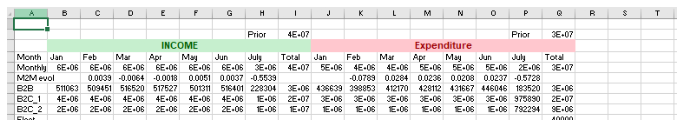

In [ ]:
# after removing the autofilers

img = mpimg.imread('images_format/img_2.PNG')
plt.imshow(img)
plt.rcParams['figure.figsize'] = [12, 10]
plt.axis('off')
plt.show()

### Month row 

Apply a format to "Months row"

1. we want the whole row of 'Months' to be blue: we'll define the respective format 
2. we need to identify the cell location of this row without manual interviention
3. apply the defined format o identified range location

Format

In [232]:
# format for Months Row
format3 = workbook.add_format({'bg_color': 'white', # background color
                               'font_color': 'blue'}) # font color

In [233]:
# add to our new format to dictionnary 
formats['format3'] = 'Months_Row'
formats

NameError: ignored

Identify range location

In [234]:
# reminder of overview_df
print('the overview_df range is', overview_range)

# reset_index
overview_df.reset_index(inplace=True, drop=True)
#overview_df = overview_df.drop('index', axis=1)
overview_df.head(10)

the overview_df range is A2:O10


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,None,None,None,None,None,None,Prior,30301058.37,None,None,None,None,None,Prior,22545374.71
1,None,INCOME,INCOME,INCOME,INCOME,INCOME,INCOME,INCOME,Expenditure,Expenditure,Expenditure,Expenditure,Expenditure,Expenditure,Expenditure
2,Month,Jan,Feb,Mar,Apr,May,Jun,Total,Jan,Feb,Mar,Apr,May,Jun,Total
3,MonthlyTotal,6062494.57,6086388.6,6047538.55,6036964.65,6067672.0,6090124.15,36391182.52,4669630.04,4301371.88,4423624.05,4528205.94,4622542.8,4732192.3,27277567.01
4,M2M ev,NaN,0.0039,-0.0064,-0.0017,0.0051,0.0037,NaN,NaN,-0.0789,0.0284,0.0236,0.0208,0.0237,NaN
5,B2B,511062.58,509450.9,516519.81,517527.25,501311.44,516400.91,3072272.89,436638.67,398853.43,412170.17,428111.79,431666.97,446046.14,2553487.17
6,B2C_1,3831880.18,3854611.41,3805590.04,3812491.34,3849616.09,3846324.85,23000513.91,2789361.87,2567819.12,2638275.8,2694214.79,2752838.69,2818012.78,16260523.05
7,B2C_2,1632362.79,1632163.9,1638109.14,1624620.66,1628838.54,1641486.29,9797581.32,1363792.71,1261822.72,1296822.06,1326183.04,1355314.35,1381178.66,7985113.54
8,Fleet,87189.02,90162.39,87319.56,82325.4,87905.93,85912.1,520814.4,79836.79,72876.61,76356.02,79696.32,82722.79,86954.72,478443.25


In [235]:
# .. We need to locate the row nb 3 that have the string 'Month' in it

# write a function to compute automatically the location of a cell in a dataframe containing a specific string

def FindPositionsInDataframe(dfIn,findme):
    positions = []
    irow =0
    while ( irow < len(dfIn.index)):
        list_colPositions=dfIn.columns[dfIn.iloc[irow,:]==findme].tolist()   
        if list_colPositions != []:
            colu_iloc = dfIn.columns.get_loc(list_colPositions[0])
            positions.append([irow, colu_iloc])
        irow +=1

    return positions

# check if the function works
FindPositionsInDataframe(overview_df, 'Month')

# the result is a nested list: 1st row, 2nd col

[[2, 0]]

In [236]:
# to be able to use this location we'll save it in a variable called loc

loc = FindPositionsInDataframe(overview_df, 'Month')
month_row = loc[0][0]
month_row

2

In [237]:
locations['Month_row'] = month_row
locations

{'nb_rows': 9,
 'nb_cols': 15,
 'overview_df_range': 'A2:O10',
 'INCOME columns range in excel': 'B:H',
 'INCOME_EXP_row': 'B3:O3',
 'Month_row': 2}

Apply the defined format to the identified location

In [238]:
# apply the form to row (in excel the 3rd row + 1 (because we have an additional row on the top))
worksheet.set_row(month_row + 1, # row numer
                  15, # row height
                  format3) # the format to apply

0

In [ ]:
'''
writer.save()
workbook.close()

# download file from Drive to your local machine
files.download("Formating_Budget.xlsx")

'''


'\nwriter.save()\nworkbook.close()\n\n# download file from Drive to your local machine\nfiles.download("Formating_Budget.xlsx")\n\n'

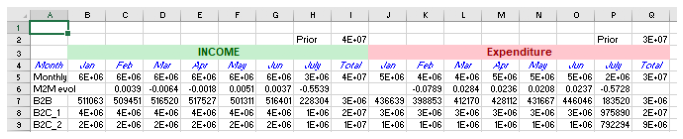

In [ ]:
#

img = mpimg.imread('images_format/img_3.PNG')
plt.imshow(img)
plt.rcParams['figure.figsize'] = [12, 10]
plt.axis('off')
plt.show()

### Monthly Total

Conditional Formating steps

1. Define conditional formats
2. Identofy locations
3. Apply formats to identified locations

We want to format MonthlyTotal row from overview_df with conditional formating

INCOME
- if there Income  have a change between -0.4 and 0.4 from M2M ==> yellow
- if there Income  have a change > 0.4 ==> green
- if there Income  have a change < -0.4 ==> red

EXPENDITURE (ooposite)
- if there Income  have a change between -0.4 and 0.4 from M2M ==> yellow
- if there Income  have a change > 0.4 ==> red
- if there Income  have a change < -0.4 ==> green

#### Conditional Format

In [239]:
# 1. define the formats for contional formatting

green_format = workbook.add_format({'bg_color': 'green'})
red_format = workbook.add_format({'bg_color': 'red'})
yellow_format = workbook.add_format({'bg_color': 'yellow'})

# add the new format to the formats dictionary

formats['green_format'] = 'if positive change in M2M ev'
formats['yellow_format'] = 'not significative change in M2M ev'
formats['red_format'] = 'if negative change in M2M ev'

formats

NameError: ignored

#### Range Location to apply the format

Firstly, we'll use the above row where we have Income and Expenditure row in the overview_df
Thanks to this row we'll be able to identify the range for INCOME / Expenditure columns ...
And therefore, to delimitate the columns relative to Income / Expenditure 

STEPS:

1. identify the row
2. identify the columns
3. compute at what index Income strings occur
4. translate the location in Excel location format

1. identify the row

In [240]:
overview_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,None,None,None,None,None,None,Prior,30301058.37,None,None,None,None,None,Prior,22545374.71
1,None,INCOME,INCOME,INCOME,INCOME,INCOME,INCOME,INCOME,Expenditure,Expenditure,Expenditure,Expenditure,Expenditure,Expenditure,Expenditure
2,Month,Jan,Feb,Mar,Apr,May,Jun,Total,Jan,Feb,Mar,Apr,May,Jun,Total
3,MonthlyTotal,6062494.57,6086388.6,6047538.55,6036964.65,6067672.0,6090124.15,36391182.52,4669630.04,4301371.88,4423624.05,4528205.94,4622542.8,4732192.3,27277567.01
4,M2M ev,NaN,0.0039,-0.0064,-0.0017,0.0051,0.0037,NaN,NaN,-0.0789,0.0284,0.0236,0.0208,0.0237,NaN


In [241]:
# identofiy location in overview_df where string INCOME occurs for the 1st time

# 1 : identify the row
loc = FindPositionsInDataframe(overview_df, 'INCOME')
print(loc)
print('the row index in overview_df containing INCOME is: ', loc[0][0])
print('the col index in overview_df containing INCOME is: ', loc[0][1])

[[1, 1]]
the row index in overview_df containing INCOME is:  1
the col index in overview_df containing INCOME is:  1


2. identify the columns

In [242]:
# 2 Identify the columns

# 2.1 : create a list where we'll see the  all INCOME, and indices of all Expenditure

# select with .iloc method in the overview_df  the row =2 
inc_exp_list = overview_df.iloc[loc[0][0], :] # we'll obtain all the values of the 2nd row from overview_df

# store this row into a list 'inc_exp_list'
inc_exp_list = list(inc_exp_list)
inc_exp_list 

[None,
 'INCOME',
 'INCOME',
 'INCOME',
 'INCOME',
 'INCOME',
 'INCOME',
 'INCOME',
 'Expenditure',
 'Expenditure',
 'Expenditure',
 'Expenditure',
 'Expenditure',
 'Expenditure',
 'Expenditure']

3. compute at what index Income strings occur

In [243]:
# 3 : identify indices only for INCOME

# identify the 'INCOME' column indices from this list "inc_exp_list"

search_idx = [] # create an empty list where to store the indices

# loop in the list inc_exp_list to identify cell containing the word INCOME
for idx in range(2, len(inc_exp_list)):
    if inc_exp_list[idx] == 'INCOME':  # if cell = INCOME
        search_idx.append(idx) # apend the index in the indices list 

print(search_idx)      
print('index where INCOME occures for the 1st time: ', search_idx[0])
print('index where INCOME occures for the last time: ', search_idx[-1])

[2, 3, 4, 5, 6, 7]
index where INCOME occures for the 1st time:  2
index where INCOME occures for the last time:  7


4. translate the column index in Excel location format

In [244]:
# use the identified locations to put them in excel format

# for Total Months on the 1st cell (1st index corresponding to January) we don't need to apply a format 
# so we add +1 to the index as the first element is Month 0 and we have nothing to compare with

print(search_idx[0]+1) # we'll get index 3

# get the respective column letter of this column with index 3
print(get_column_letter(search_idx[0]+1)) # column C

# index where to end
print(search_idx[-1]) # the last element of list with indices ==> we'll get 7

# get the respective column letter of the last column
print(get_column_letter(search_idx[-1])) # we'll get G

3
C
7
G


In [245]:
# we have the column indices where to apply the conditional formating
# now we need to find the row location of 'MonthlyTotal' row where we'll apply the condition formating

FindPositionsInDataframe(overview_df, 'MonthlyTotal')[0][0] + 1 + 1 # because of the extra row

5

In [246]:
# write the string that will represent the cell range in Excel style as 'C5:G5' named "cellrange"
# for this we need to combine the indentified references to construct that range : 
  # get_column_letter(search_idx[0]+1) ==> for the start column , well get C
  # FindPositionsInDataframe(overview_df, 'MonthlyTotal')[0][0] + 1) ==> for the start row ==> 5
  # string ":" ==> from C5:G5
  # get_column_letter(search_idx[-1]) ==> ==> for the end column , well get G
  # FindPositionsInDataframe(overview_df, 'MonthlyTotal')[0][0] + 1) ==> for the end row ==> the same 5
# concatenate all sub_strings to get the cellrange string  with Excel style format as 'C5:G5'

cellrange = str(get_column_letter(search_idx[0]+1)) +  \
str(FindPositionsInDataframe(overview_df, 'MonthlyTotal')[0][0] + 2)+  \
str(':') +  \
str(get_column_letter(search_idx[-1])) + \
str(FindPositionsInDataframe(overview_df, 'MonthlyTotal')[0][0] + 2) 

cellrange

'C5:G5'

In [247]:
# add to lactions dictionnary

locations['MonthlyTotal range for Income without Total']= cellrange
locations

{'nb_rows': 9,
 'nb_cols': 15,
 'overview_df_range': 'A2:O10',
 'INCOME columns range in excel': 'B:H',
 'INCOME_EXP_row': 'B3:O3',
 'Month_row': 2,
 'MonthlyTotal range for Income without Total': 'C5:G5'}

Conditional Formatting Examples

We want to apply conditional formating on identified range location... (named cellrange)

Documentation for Conditional Formating:

https://xlsxwriter.readthedocs.io/working_with_conditional_formats.html https://www.tutorialspoint.com/python_xlsxwriter/python_xlsxwriter_conditional_formatting.htm

Syntax:
Write a conditional format to range of cells....

conditional_format(first_row, first_col, last_row, last_col,
                   options)

Parameters:	

..for location : 

first_row (int) – The first row of the range. (All zero indexed.)
first_col (int) – The first column of the range.
last_row (int) – The last row of the range.
last_col (int) – The last col of the range.

..for formatting

options (dict) – Conditional formating options written with syntax as dictionnary {...}

Returns:	0: Success.
Returns:   -1: Row or column is out of worksheet bounds.
Returns:   -2: Incorrect parameter or option.

In [248]:
# Example 1 conditional formatting based on a simple formula

# for the example create a workbook wb
wb = xlsxwriter.Workbook('conditional_formatting_1.xlsx')
# add a worksheet ws
ws = wb.add_worksheet()

# create dummy data for the example
data=[56,95,63,34,81,47,74,5,99,12]
row=0

# write the data in worksheet
for num in data:
        ws.write(row,0,num)
        row+=1

# define format
f1 = wb.add_format({'bg_color': '#D9D9D9', 'font_color': 'red'})

# define format
f1 = wb.add_format({'bg_color': '#D9D9D9', 'font_color': 'red'})

# apply conditional formatting
# We want to apply the format f1 to cells that are less then 50
ws.conditional_format(
   'A1:A10', # the range where to apply
    # options
    {'type':'cell', #  type option is a required. Possible values: cell, date, text, formula, etc
    'criteria':'<', # Criteria is alike a formula, it sets the condition by which the cell data will be evaluated
    'value':50, # Value parameter is the operand of the criteria that forms the rule 
    'format':f1 # format to apply
    })
    
#close wb                       
wb.close()

# download file from Drive to your local machine
files.download("conditional_formatting_1.xlsx")



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [249]:
# Example 2 of conditional formatting based on formula:

# for the example create a workbook wb
wb = xlsxwriter.Workbook('conditional_formatting_2.xlsx') 
# add a worksheet ws
ws = wb.add_worksheet()

# create dummy data for the example
data = [['Anil', 45, 55, 50], ['Ravi', 60, 70, 80],
        ['Kiran', 65, 75, 85], ['Karishma', 55, 65, 45]]
       
# write the data in worksheet
for row in range(len(data)):
      ws.write_row(row,0, data[row])

# define format
f2 = wb.add_format({'font_color': 'blue', 'bold':True})


# Apply conditional formatting
# We want to apply the format f3  to cellrange where the row's average is > 60
ws.conditional_format(
   'A1:D4', # the range where to apply
    # Conditional formating options 
    {'type':'formula', #  type option is a required. Possible values: cell, date, text, formula, etc
    'criteria':'=AVERAGE($B1:$D1)>=60', # Criteria is like a formula, 
     # it sets the condition by which the cell data will be evaluated
     # here the criteria stipulates if the row average is >=60
      #  !!!! please take note of the formula used in criteria 
      #  we use $ operand as we want to fix the reference ONLY for column B and D, 
      # so that it remains unchanged no matter where the formula moves
      # we do not fix row nb
     'format':f2 # format we want to aply if the crietria is satisfied
   })

# close the workbook
wb.close()

# download file from Drive to your local machine
files.download("conditional_formatting_2.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Back to our formatting...

For our identified callrange we want to apply:

1. yellow_format : if there Income have a change between [-0.4, 0.4] % from M2M
2. green_format : if there Income have a change > 0.4 %
3. red_format : if there Income have a change < 0.4 %

For the **criteria** parameter, we have to write the formula from the criteria in Excel style

...What we're looking for is to write the formula as a string as follow:

1. green : '=(C5-B5)/B5 > 0.004' ==> if the change from previous month in % (calculated as (C5-B5)/B5 greater 0.004
2. red: '=(C5-B5)/B5 < -0.004' ==> if the change from previous month in % (calculated as (C5-B5)/B5 less 0.004
3. yellow :  '=AND((C5-B5)/B5 >= -0.004, (C5-B5)/B5 <= 0.004)' ==> if the change from previous month in % s between [-0.004, 0.004]

What we need to do is to write in python the string of the formulas in Excel style:

1. gather all location elements (C5, 'B5')
2. concatenate them as a joined string : string = str1 + str2 +...
3. write only a single time the formula on the 1st cell 
4. make sure the formula syntax is correct, as it has to adapt dynamically to the cell reference

#### Location elements

What we need to do is to write in python the string of the formulas in Excel style:

1. gather all location elements (C5, 'B5')
2. concatenate them as a joined string : string = str1 + str2 +...
3. write only a single time the formula on the 1st cell 
4. make sure the formula syntax is correct, as it has to adapt dynamically to the cell reference

In [250]:
# Concerning the row  Monthly Total, what locations we got so far ?? :

print('the range: ', cellrange)
print('indices of months where is Income: ', search_idx)
print('the column letter for the second month (February): ', get_column_letter(search_idx[0]+1))
print('the column letter for the last month: ', get_column_letter(search_idx[-1]))
print('Excel row nb where to apply the format: ' ,FindPositionsInDataframe(overview_df, 'MonthlyTotal')[0][0] + 1)

the range:  C5:G5
indices of months where is Income:  [2, 3, 4, 5, 6, 7]
the column letter for the second month (February):  C
the column letter for the last month:  G
Excel row nb where to apply the format:  4


#### Formula string for criteria

In [251]:
# Our formula for computing the change from M2M in % : 
### difference between the one month and the prior month
### devided by prior month
### dynamic formula will be (C5-B5)/B5

# the month we start with is February that have in our excel is at column C
# so the cell notation for our Income in February is:

month_ref = get_column_letter(search_idx[0]+1) + \
           str(FindPositionsInDataframe(overview_df, 'MonthlyTotal')[0][0] + 2)
print('Month Income ref: ', month_ref)

# the prior month to February that we have in our excel is at column B 
# so we need to extract -1 from column index to shift to the left with one column
# so the cell notation for our Income in January is:

prior_month_ref = get_column_letter(search_idx[0]) + \
           str(FindPositionsInDataframe(overview_df, 'MonthlyTotal')[0][0] + 2)
print('Month Income ref: ', prior_month_ref)

# now that we have the necessary locations, we can concatenate them into a string

change = '(' + month_ref + '-' + prior_month_ref + ')' + '/' + prior_month_ref
print('formula for monthly change in %: ', change)

Month Income ref:  C5
Month Income ref:  B5
formula for monthly change in %:  (C5-B5)/B5


In [252]:
# Example how to write dynamically strings

# in quote marks write the text
# in braces symbol insert the variables that will change dynamically
# add .format() with variables 
my_string = "{a} is prior to {b}".format(a= 'January', b='February')
my_string

'January is prior to February'

In [253]:
# Write dynamically the formula string for criteria

                                                                           
low_threshold = -0.004
high_threshold = 0.004
 
# reproduce '=(C5-B5)/B5 > 0.004'
greater = "={a} > {b}".format(a= change, b=high_threshold)  
# reproduce '=(C5-B5)/B5 < 0.004'
lower = "={a} < {b}".format(a= change, b=high_threshold)  
# reproduce '=AND((C5-B5)/B5 >= -0.004, (C5-B5)/B5 <= 0.004)'
between = "=AND({a} >= {b} , {a} <= {c})".format(a= change, b=low_threshold,  c=high_threshold)

print(greater)
print(lower)
print(between)

=(C5-B5)/B5 > 0.004
=(C5-B5)/B5 < 0.004
=AND((C5-B5)/B5 >= -0.004 , (C5-B5)/B5 <= 0.004)


#### Apply conditional formatting

In [254]:
cellrange

'C5:G5'

In [255]:
# apply the formatting for identified range (here Income)
worksheet.conditional_format(cellrange, # the range where to apply
                             {'type':   'formula', # apply to a cell that have formula
                              # between formula
                              'criteria': between,
                             'format':   yellow_format}) # apply the respective format

worksheet.conditional_format(cellrange,
                             {'type':   'formula',
                              # greater formula
                              'criteria': greater,
                              'format':   green_format})

worksheet.conditional_format(cellrange,
                             {'type':   'formula',
                              # lower formula
                              'criteria': lower,
                              'format':   red_format})


0

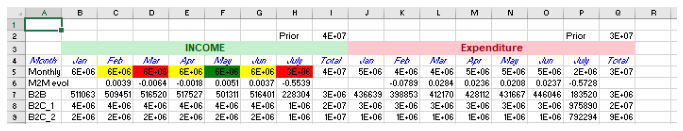

In [ ]:
# conditional formating

img = mpimg.imread('images_format/img_4.PNG')
plt.imshow(img)
plt.rcParams['figure.figsize'] = [12, 10]
plt.axis('off')
plt.show()

In [ ]:
'''
writer.save()
workbook.close()

# download file from Drive to your local machine
files.download("Formating_Budget.xlsx")

'''

'\nwriter.save()\nworkbook.close()\n\n# download file from Drive to your local machine\nfiles.download("Formating_Budget.xlsx")\n\n'

The same thing for Exp

In [256]:
# 3 : identify indices only for Exp

# identify the 'Exp' column indices from this list "inc_exp_list"

search_idx = [] # create an empty list where to store the indices

# loop in the list inc_exp_list to identify cell containing the word INCOME
for idx in range(2, len(inc_exp_list)):
    if inc_exp_list[idx] == 'Expenditure':  # if cell = EXPENDITURE
        search_idx.append(idx) # apend the index in the indices list 

print(search_idx)      
print('index where Exp occures for the 1st time: ', search_idx[0])
print('index where EXP occures for the last time: ', search_idx[-1])

[8, 9, 10, 11, 12, 13, 14]
index where Exp occures for the 1st time:  8
index where EXP occures for the last time:  14


In [257]:
# Our formula for computing the change from M2M in % : 
### difference between the one month and the prior month
### devided by prior month
### dynamic formula will be (I5-H5)/H5

# the month we start with is February that have in our excel is at column C
# so the cell notation for our Exp in February is:

month_ref = get_column_letter(search_idx[0]+1) + \
           str(FindPositionsInDataframe(overview_df, 'MonthlyTotal')[0][0] + 2)
print('Month Income ref: ', month_ref)

# the prior month to February that we have in our excel is at column B 
# so we need to extract -1 from column index to shift to the left with one column
# so the cell notation for our Exp in January is:

prior_month_ref = get_column_letter(search_idx[0]) + \
           str(FindPositionsInDataframe(overview_df, 'MonthlyTotal')[0][0] + 2)
print('Month Income ref: ', prior_month_ref)

# now that we have the necessary locations, we can concatenate them into a string

change = '(' + month_ref + '-' + prior_month_ref + ')' + '/' + prior_month_ref
print('formula for monthly change in %: ', change)

Month Income ref:  I5
Month Income ref:  H5
formula for monthly change in %:  (I5-H5)/H5


In [258]:
# Write dynamically the formula string for criteria

                                                                           
low_threshold = -0.004
high_threshold = 0.004
 
# reproduce '=(I5-H5)/H5 > 0.004'
greater = "={a} > {b}".format(a= change, b=high_threshold)  
# reproduce '=(I5-H5)/H5 < 0.004'
lower = "={a} < {b}".format(a= change, b=high_threshold)  
# reproduce '=AND((I5-H5)/H5 >= -0.004, ((I5-H5)/H5 <= 0.004)'
between = "=AND({a} >= {b} , {a} <= {c})".format(a= change, b=low_threshold,  c=high_threshold)

print(greater)
print(lower)
print(between)

=(I5-H5)/H5 > 0.004
=(I5-H5)/H5 < 0.004
=AND((I5-H5)/H5 >= -0.004 , (I5-H5)/H5 <= 0.004)


In [259]:
# cellrange for Exp
cellrange = str(get_column_letter(search_idx[0]+1)) +  \
str(FindPositionsInDataframe(overview_df, 'MonthlyTotal')[0][0] + 2)+  \
str(':') +  \
str(get_column_letter(search_idx[-1])) + \
str(FindPositionsInDataframe(overview_df, 'MonthlyTotal')[0][0] + 2) 

cellrange

'I5:N5'

In [260]:
# apply conditional formating for Exp
worksheet.conditional_format(cellrange, # the range where to apply
                             {'type':   'formula', # apply to a cell that have formula
                              # between formula
                              'criteria': between,
                             'format':   yellow_format}) # apply the respective format

worksheet.conditional_format(cellrange,
                             {'type':   'formula',
                              # greater formula
                              'criteria': greater,
                              'format':   green_format})

worksheet.conditional_format(cellrange,
                             {'type':   'formula',
                              # lower formula
                              'criteria': lower,
                              'format':   red_format})

0

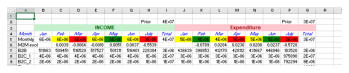

In [263]:
# conditional formating Exp

img = mpimg.imread('images_format/img_5.PNG')
plt.imshow(img)
plt.rcParams['figure.figsize'] = [12, 10]
plt.axis('off')
plt.show()

In [262]:
'''
writer.save()
workbook.close()

# download file from Drive to your local machine
files.download("Formating_Budget.xlsx")

'''

'\nwriter.save()\nworkbook.close()\n\n# download file from Drive to your local machine\nfiles.download("Formating_Budget.xlsx")\n\n'

### M2M evol % format 

In [269]:
# define pct formating formatting
pct_format = workbook.add_format({'num_format': '0.00%', #the format of the %
                                  'font_size': 12, 
                                  'italic': True,
                                  'align': 'center', # horizontal align
                                  'valign': 'vcenter' }) # vertical align

# add new format to our formats dictionary
formats['pct_format'] = 'percentage'
formats

{'format1': 'Expenditure', 'format2': 'Income', 'pct_format': 'percentage'}

In [270]:
# identify the row with M2M evol using the function FindPositionsInDataframe

loc = FindPositionsInDataframe(overview_df, 'M2M ev')
print('the row nb of M2M evol is: ', loc[0][0]+2)

# add to location dictionary

locations['M2M evol row'] = loc[0][0]+2
locations

the row nb of M2M evol is:  6


{'nb_rows': 9,
 'nb_cols': 15,
 'overview_df_range': 'A2:O10',
 'INCOME columns range in excel': 'B:H',
 'INCOME_EXP_row': 'B3:O3',
 'Month_row': 2,
 'MonthlyTotal range for Income without Total': 'C5:G5',
 'M2M evol row': 6}

In [271]:
# apply the percentage format to row with set_row(row, height, format) 
# documentation : https://cxn03651.github.io/write_xlsx/worksheet.html#set_row

# apply the format on the whole row with .set_row() function
worksheet.set_row(loc[0][0] + 1 , # row numer in excel
                  None, # None do not change the row height
                  pct_format) # the format to apply

0

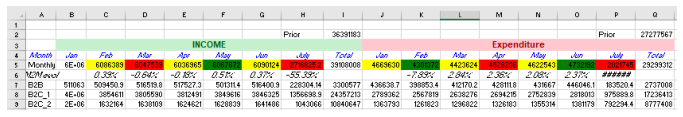

In [272]:
# conditional formating Exp

img = mpimg.imread('images_format/img_6.PNG')
plt.imshow(img)
plt.rcParams['figure.figsize'] = [12, 10]
plt.axis('off')
plt.show()

In [ ]:
'''
writer.save()
workbook.close()

# download file from Drive to your local machine
files.download("Formating_Budget.xlsx")
'''


'\nwriter.save()\nworkbook.close()\n\n# download file from Drive to your local machine\nfiles.download("Formating_Budget.xlsx")\n'

### Format numbers: separate thousands

In [ ]:
overview_df.head(7)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,None,None,None,None,None,None,Prior,30301058.37,None,None,None,None,None,Prior,22545374.71
1,None,INCOME,INCOME,INCOME,INCOME,INCOME,INCOME,INCOME,Expenditure,Expenditure,Expenditure,Expenditure,Expenditure,Expenditure,Expenditure
2,Month,Jan,Feb,Mar,Apr,May,Jun,Total,Jan,Feb,Mar,Apr,May,Jun,Total
3,MonthlyTotal,6062494.57,6086388.6,6047538.55,6036964.65,6067672.0,6090124.15,36391182.52,4669630.04,4301371.88,4423624.05,4528205.94,4622542.8,4732192.3,27277567.01
4,M2M ev,NaN,0.0039,-0.0064,-0.0017,0.0051,0.0037,NaN,NaN,-0.0789,0.0284,0.0236,0.0208,0.0237,NaN
5,B2B,511062.58,509450.9,516519.81,517527.25,501311.44,516400.91,3072272.89,436638.67,398853.43,412170.17,428111.79,431666.97,446046.14,2553487.17
6,B2C_1,3831880.18,3854611.41,3805590.04,3812491.34,3849616.09,3846324.85,23000513.91,2789361.87,2567819.12,2638275.8,2694214.79,2752838.69,2818012.78,16260523.05


In [273]:
# Set a number format for all columns between B:S
format4 = workbook.add_format({'num_format': '#,##0', # number format: no decimal, thousands separted by ,
                                   'font_size': 10})

# set the column width with set_column = 14, and apply the numeric format to thses columns
worksheet.set_column('B:O', 14, format4)

# add the format to our formats dictionary

formats['format4'] = 'numeric format for col B:O'
formats

{'format1': 'Expenditure',
 'format2': 'Income',
 'pct_format': 'percentage',
 'format4': 'numeric format for col B:O'}

In [274]:
# find the row where business_df starts
business_row = FindPositionsInDataframe(overview_df, 'B2B')[0][0] + 1
business_row

6

In [275]:
# compute the range of the whole dataframe 
business_col = overview_df.shape[1]
business_row_last = business_df.shape[0]

# the df range in excel 
business_range = xl_range(business_row, # starting row
                    1, # starting column
                    business_row_last + 2, 
                    business_col - 1)                 
business_range

'B7:O7'

In [276]:
# business_df = business_df.set_index('Business')
business_df

,Jan Income,Feb Income,Mar Income,Apr Income,May Income,Jun Income,Total Income,Jan Expenditure,Feb Expenditure,Mar Expenditure,Apr Expenditure,May Expenditure,Jun Expenditure,Total Expenditure
Business,,,,,,,,,,,,,,
B2B,511062.58,509450.90,516519.81,517527.25,501311.44,516400.91,3072272.89,436638.67,398853.43,412170.17,428111.79,431666.97,446046.14,2553487.17
B2C_1,3831880.18,3854611.41,3805590.04,3812491.34,3849616.09,3846324.85,23000513.91,2789361.87,2567819.12,2638275.80,2694214.79,2752838.69,2818012.78,16260523.05
B2C_2,1632362.79,1632163.90,1638109.14,1624620.66,1628838.54,1641486.29,9797581.32,1363792.71,1261822.72,1296822.06,1326183.04,1355314.35,1381178.66,7985113.54
Fleet,87189.02,90162.39,87319.56,82325.40,87905.93,85912.10,520814.40,79836.79,72876.61,76356.02,79696.32,82722.79,86954.72,478443.25


In [277]:
# apply the format with conditional formating if no blanks
worksheet.conditional_format(business_range, {'type': 'no_blanks',
                                     'format': format4})

0

In [ ]:
'''
writer.save()
workbook.close()

# download file from Drive to your local machine
files.download("Formating_Budget.xlsx")

'''

'\nwriter.save()\nworkbook.close()\n\n# download file from Drive to your local machine\nfiles.download("Formating_Budget.xlsx")\n\n'

### Borders 

#### Example of Borders 

In [278]:
# Example of Borders formating:

# for the example create a workbook wb
wb = xlsxwriter.Workbook('Borders.xlsx') 
# add a worksheet ws
ws = wb.add_worksheet()

# create dummy data for the example
data = [['Anil', 45, 55, 50], ['Ravi', 60, 70, 80], ['Rajish', None, None, 35],
        ['Kiran', None, None, 59], ['Karishma', 55, 65, 45]]
       
# write the data in worksheet (dataframe from row=2, and col=2)
for row in range(len(data)): # in the loop, first value assigned to row is 0, the last will be 3
      ws.write_row(row + 1,  # we add +1 because we want to write data starting the 2nd row
                   1, # starting column where we write data
                   data[row]) # item from data : ['Anil', 45, 55, 50], ['Ravi', 60, 70, 80]..

# close the workbook
wb.close()

# download file from Drive to your local machine
files.download("Borders.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

To add borders to a cellrange already containing values we have to use conditional formatting

To add borders is like adding a  <i>format</i>   with main parameters:
<ol>
    <li>top</li>
    <li>bottom</li>
    <li>right</li>
    <li>left</li>
     ....
    <li> border_colors</li>
</ol>

BORDERS WITH NO BLANKS

In [279]:
# for the example create a workbook wb
wb = xlsxwriter.Workbook('Borders.xlsx') 
# add a worksheet ws
ws = wb.add_worksheet()

# write the data in worksheet (dataframe from row=2, and col=2)
for row in range(len(data)):
      ws.write_row(row + 1,1, data[row])
        
ws.conditional_format('B2:E6', # the range where to apply borders
                              {'type': 'no_blanks', # apply borders for cells that are type no_blanks
                               'format': wb.add_format({'top': 1, #  apply top border with width 1
                                                        'bottom':1, #  apply bottom border with width 1
                                                         'right': 2, #  apply right border with width 2
                                                         'left' : 2, #  apply left border with width 2
                                                         'border_color': 'red'}) # border color red
                               })

# close the workbook
wb.close()

# download file from Drive to your local machine
# files.download("Borders.xlsx")

BORDERS WITH BLANKS

In [280]:
# for the example create a workbook wb
wb = xlsxwriter.Workbook('Borders.xlsx') 
# add a worksheet ws
ws = wb.add_worksheet()

# write the data in worksheet (dataframe from row=2, and col=2)
for row in range(len(data)):
      ws.write_row(row + 1,1, data[row])
        
                        
ws.conditional_format('A1:E6', # the range where to apply borders, # enlarge the cellrange
                              {'type': 'blanks', # apply borders for cells of type "blanks"
                               'format': wb.add_format({'top':1, # apply top border with width 1
                                                        'bottom':1,
                                                        'right': 1,
                                                         'left' : 1,
                                                         'border_color': 'blue'})
                               })

# close the workbook
wb.close()
# files.download("Borders.xlsx")

TOP Border

In [281]:
# top border

# for the example create a workbook wb
wb = xlsxwriter.Workbook('Borders.xlsx') 
# add a worksheet ws
ws = wb.add_worksheet()

# write the data in worksheet (dataframe from row=2, and col=2)
for row in range(len(data)):
      ws.write_row(row + 1,1, data[row])

ws.conditional_format('B2:E2',
                              {'type': 'formula', 'criteria': 'True',
                               'format': wb.add_format({'top': 2, 
                                                       'border_color': 'red'})
                               })

# close the workbook
wb.close()
# files.download("Borders.xlsx")

BOTTOM Border

In [282]:
# bottom border

# for the example create a workbook wb
wb = xlsxwriter.Workbook('Borders.xlsx') 
# add a worksheet ws
ws = wb.add_worksheet()

# write the data in worksheet (dataframe from row=2, and col=2)
for row in range(len(data)):
      ws.write_row(row + 1,1, data[row])

ws.conditional_format('B6:E6',
                              {'type': 'formula', 'criteria': 'True',
                               'format': wb.add_format({'bottom': 2, 
                                                       'border_color': 'green'})
                               })

# close the workbook
wb.close()
# files.download("Borders.xlsx")

LEFT Bordert

In [283]:
# for the example create a workbook wb
wb = xlsxwriter.Workbook('Borders.xlsx') 
# add a worksheet ws
ws = wb.add_worksheet()

# write the data in worksheet (dataframe from row=2, and col=2)
for row in range(len(data)):
      ws.write_row(row + 1,1, data[row])

ws.conditional_format('B2:B6',
                              {'type': 'formula', 'criteria': 'True',
                               'format': wb.add_format({'left': 2, 
                                                       'border_color': 'blue'})
                               })

# close the workbook
wb.close()
# files.download("Borders.xlsx")

RIGHT Border

In [284]:
# for the example create a workbook wb
wb = xlsxwriter.Workbook('Borders.xlsx') 
# add a worksheet ws
ws = wb.add_worksheet()

# write the data in worksheet (dataframe from row=2, and col=2)
for row in range(len(data)):
      ws.write_row(row + 1,1, data[row])

ws.conditional_format('E2:E6',
                              {'type': 'formula', 'criteria': 'True',
                               'format': wb.add_format({'right': 2, 
                                                       'border_color': 'black'})
                               })

# close the workbook
wb.close()
# files.download("Borders.xlsx")

TOP + BOTTOM + LEFT + RIGHT

In [285]:
# we want to superimpose a new format on another (add a newformat on the top of other)
# top + bottom border

# for the example create a workbook wb
wb = xlsxwriter.Workbook('Borders.xlsx') 
# add a worksheet ws
ws = wb.add_worksheet()

# write the data in worksheet (dataframe from row=2, and col=2)
for row in range(len(data)):
      ws.write_row(row + 1,1, data[row])


# top
ws.conditional_format('B2:E2',
                              {'type': 'formula', 'criteria': 'True',
                               'format': wb.add_format({'top': 1, 
                                                       'border_color': 'red'})
                               })

# bottom

ws.conditional_format('B6:E6',
                              {'type': 'formula', 'criteria': 'True',
                               'format': wb.add_format({'bottom': 1, 
                                                       'border_color': 'green'})
                               })


# right

ws.conditional_format('E2:E6',
                              {'type': 'formula', 'criteria': 'True',
                               'format': wb.add_format({'right': 1, 
                                                       'border_color': 'black'})
                               })


# left

ws.conditional_format('B2:B6',
                              {'type': 'formula', 'criteria': 'True',
                               'format': wb.add_format({'left': 1, 
                                                       'border_color': 'blue'})
                               })


# close the workbook
wb.close()

files.download("Borders.xlsx")

# !!!! you CAN NOT ADD a NEW FORMAT ON AN EXISTING FORMAT !!!! It will ignore the corners

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Function to drow a frame border

In [286]:
# Function to drow a frame border

# draw a frame around an existing range of values 

# !!! this function is 0 indexed !!! (meaning the 1st row and column have index 0

def draw_frame_border(workbook, worksheet, first_row, first_col, rows_count, cols_count):

    # top left corner
    worksheet.conditional_format(first_row, first_col,
                                 first_row, first_col,
                                 {'type': 'formula', 'criteria': 'True',
                                  'format': workbook.add_format({'top': 1, 'left': 1})})
    # top right corner
    worksheet.conditional_format(first_row, first_col + cols_count - 1,
                                 first_row, first_col + cols_count - 1,
                                 {'type': 'formula', 'criteria': 'True',
                                  'format': workbook.add_format({'top': 1, 'right': 1})})
    # bottom left corner
    worksheet.conditional_format(first_row + rows_count - 1, first_col,
                                 first_row + rows_count - 1, first_col,
                                 {'type': 'formula', 'criteria': 'True',
                                  'format': workbook.add_format({'bottom': 1, 'left': 1})})
    # bottom right corner
    worksheet.conditional_format(first_row + rows_count - 1, first_col + cols_count - 1,
                                 first_row + rows_count - 1, first_col + cols_count - 1,
                                 {'type': 'formula', 'criteria': 'True',
                                  'format': workbook.add_format({'bottom': 1, 'right': 1})})

    # top
    worksheet.conditional_format(first_row, first_col + 1,
                                 first_row, first_col + cols_count - 2,
                                 {'type': 'formula', 'criteria': 'True', 'format': workbook.add_format({'top': 1})})
    
    # left
    worksheet.conditional_format(first_row + 1,              first_col,
                                 first_row + rows_count - 2, first_col,
                                 {'type': 'formula', 'criteria': 'True', 'format': workbook.add_format({'left': 1})})
    # bottom
    worksheet.conditional_format(first_row + rows_count - 1, first_col + 1,
                                 first_row + rows_count - 1, first_col + cols_count - 2,
                                 {'type': 'formula', 'criteria': 'True', 'format': workbook.add_format({'bottom': 1})})
    # right
    worksheet.conditional_format(first_row + 1,              first_col + cols_count - 1,
                                 first_row + rows_count - 2, first_col + cols_count - 1,
                                 {'type': 'formula', 'criteria': 'True', 'format': workbook.add_format({'right': 1})})

In [287]:
# for the example create a workbook wb
wb = xlsxwriter.Workbook('Borders.xlsx') 
# add a worksheet ws
ws = wb.add_worksheet()

# write the data in worksheet (dataframe from row=2, and col=2)
for row in range(len(data)):
      ws.write_row(row + 1,1, data[row])

# B2:E5 cellrange
draw_frame_border(workbook= wb,
             worksheet= ws, 
             first_row = 1, # starting row (beacause is indexed 0, it will mean 2nd row)
             first_col = 1, # starting column (beacause is indexed 0, it will mean 2nd column)
             rows_count = 5 , # nb of rows to add, or last row (rows indexed from 0)
             cols_count = 4) # nb of columns to add, or last column (tcolumns indexed from 0)

# check that the range location is that we expect
print(xl_range(1,1, 5,4))

# close the workbook
wb.close()

# files.download("Borders.xlsx")

B2:E6


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#### Frame border OVERVIEW_df

In [288]:
locations['overview_range'] = overview_range
locations

{'nb_rows': 9,
 'nb_cols': 15,
 'overview_df_range': 'A2:O10',
 'INCOME columns range in excel': 'B:H',
 'INCOME_EXP_row': 'B3:O3',
 'Month_row': 2,
 'MonthlyTotal range for Income without Total': 'C5:G5',
 'M2M evol row': 6,
 'overview_range': 'A2:O10'}

Utility functions helpful for cell, range location
<ol>
    <li>xl_rowcol_to_cell(1, 2) ===> C2, converts a zero indexed to an C2 style string: </li>
    <li> xl_cell_to_rowcol('A1') ===> (0, 0), from Excel ref. converts to row nb and col nb</li>
    <li> xl_col_to_name(0) ===> A, converts number to column letter </li> 
    <li> xl_range(0, 0, 9, 0) ===> A1:A10, convert from sarting row, col to ending row, col to Excel reference
    <li>get_column_letter </li> 
     <li>column_index_from_string</li> 

</ol>

INCOME

In [289]:
#### Compute the range for the frame border for INCOME

# ROWS

# 1st row
first_row = FindPositionsInDataframe(overview_df, 'INCOME')[0][0]
print(first_row)

# rows count
rows_count  = max_row- first_row + 1
print(rows_count)

# COLUMNS

# for column indices we're going to use inc_exp_list
print(inc_exp_list)

# columns

search_idx = [] # create an empty list where to store the indices
# loop in the list inc_exp_list to identify cell containing the word INCOME
for el in range(0, len(inc_exp_list)):
    if inc_exp_list[el] == 'INCOME':  # if cell = INCOME
        search_idx.append(el) # apend the index in the indices list 
print(search_idx)
print('index where INCOME occures for the 1st time: ', search_idx[0])
print('index where INCOME occures for the last time: ', search_idx[-1])

first_col = search_idx[0]
cols_count = search_idx[-1] - first_col + 1

#rows
print('start row', first_row)
print('rows to add', rows_count)

# columns
print('first col', first_col) #1st col
print('cols to add', cols_count) # last col

# check if he have the right coordinates

xl_range(first_row, # start row
         first_col, # start col
         rows_count, # rows count
         cols_count) # cols c


1
1937
[None, 'INCOME', 'INCOME', 'INCOME', 'INCOME', 'INCOME', 'INCOME', 'INCOME', 'Expenditure', 'Expenditure', 'Expenditure', 'Expenditure', 'Expenditure', 'Expenditure', 'Expenditure']
[1, 2, 3, 4, 5, 6, 7]
index where INCOME occures for the 1st time:  1
index where INCOME occures for the last time:  7
start row 1
rows to add 1937
first col 1
cols to add 7


'B2:H1938'

In [290]:
# Income Borders

draw_frame_border(workbook= workbook,
                  worksheet= worksheet, 
                  first_row = first_row, 
                  first_col = first_col,
                  rows_count = rows_count, 
                  cols_count = cols_count) 

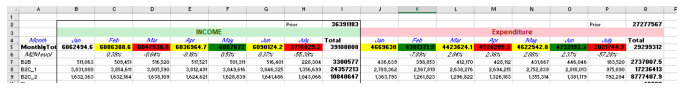

In [291]:
# Frame Border Income

img = mpimg.imread('images_format/img_10.PNG')
plt.imshow(img)
plt.rcParams['figure.figsize'] = [12, 10]
plt.axis('off')
plt.show()

In [ ]:
'''
writer.save()
workbook.close()

# download file from Drive to your local machine
files.download("Formating_Budget.xlsx")

'''


EXPENDITURE

In [292]:
#### Compute the range for the frame border for INCOME

# ROWS

# 1st row
first_row = FindPositionsInDataframe(overview_df, 'Expenditure')[0][0]
print(first_row)

# rows count
rows_count  = max_row- first_row + 1
print(rows_count)

# COLUMNS

# for column indices we're going to use inc_exp_list
print(inc_exp_list)

# columns

search_idx = [] # create an empty list where to store the indices
# loop in the list inc_exp_list to identify cell containing the word Exp
for el in range(0, len(inc_exp_list)):
    if inc_exp_list[el] == 'Expenditure':  # if cell = Exp
        search_idx.append(el) # apend the index in the indices list 
print(search_idx)
print('index where INCOME occures for the 1st time: ', search_idx[0])
print('index where INCOME occures for the last time: ', search_idx[-1])

first_col = search_idx[0]
cols_count = search_idx[-1] - first_col + 1

#rows
print('start row', first_row)
print('rows to add', rows_count)

# columns
print('first col', first_col) #1st col
print('cols to add', cols_count) # last col

# check if he have the right coordinates

xl_range(first_row, # start row
         first_col, # start col
         rows_count, # rows count
         cols_count) # cols c


1
1937
[None, 'INCOME', 'INCOME', 'INCOME', 'INCOME', 'INCOME', 'INCOME', 'INCOME', 'Expenditure', 'Expenditure', 'Expenditure', 'Expenditure', 'Expenditure', 'Expenditure', 'Expenditure']
[8, 9, 10, 11, 12, 13, 14]
index where INCOME occures for the 1st time:  8
index where INCOME occures for the last time:  14
start row 1
rows to add 1937
first col 8
cols to add 7


'I2:H1938'

In [293]:
# EXP Borders

draw_frame_border(workbook= workbook,
                  worksheet= worksheet, 
                  first_row = first_row, 
                  first_col = first_col,
                  rows_count = rows_count, 
                  cols_count = cols_count) 

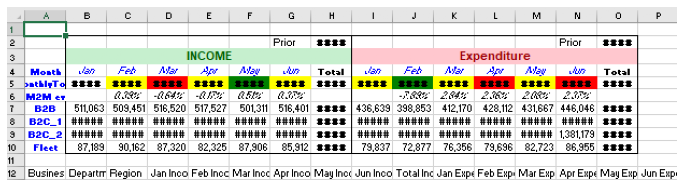

In [294]:
# Frame Border Income

img = mpimg.imread('images_format/img_11.PNG')
plt.imshow(img)
plt.rcParams['figure.figsize'] = [12, 10]
plt.axis('off')
plt.show()

In [ ]:
'''
writer.save()
workbook.close()

# download file from Drive to your local machine
files.download("Formating_Budget.xlsx")

'''


### ROW Labels

In [295]:
# column with indices as Month, Monthly Total Ev. M2M, ...

# nd_col_range == > 'A3:A10'
ind_col_range = xl_range(row_index  , # start row
                         0, # start com
                         max_row, # end row
                         0) # end col
ind_col_range

'A3:A1938'

In [296]:
# format for indices
format5 = workbook.add_format({'bg_color': 'white', # background color
                               'font_color': 'blue', 
                                'bold': True
                              }) #font col

In [297]:
# Write the column headers with the defined format.
for row, value in enumerate(overview_df.iloc[:,0]):
    worksheet.write(row + 1, # on what row
                    0, # which column
                    value, # value to write
                    format5) # format to apply


In [298]:
for row, value in enumerate(overview_df.iloc[:,0]):
  print(row+ 1, value)



1 None
2 None
3 Month
4 MonthlyTotal
5 M2M ev
6 B2B
7 B2C_1
8 B2C_2
9 Fleet


In [299]:
# apply the form to cellrange (here is the column with range 'A4:A10')
worksheet.set_column('A:A', # row to apply
                     18, # column width
                     None) # the format we want to apply

0

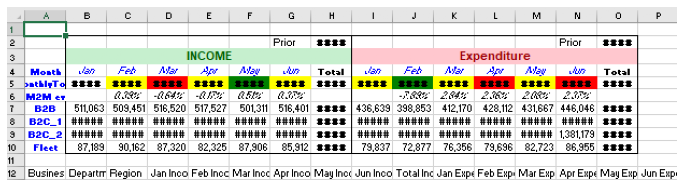

In [300]:
# Rows labels

img = mpimg.imread('images_format/img_11.PNG')
plt.imshow(img)
plt.rcParams['figure.figsize'] = [12, 10]
plt.axis('off')
plt.show()

In [ ]:
'''
writer.save()
workbook.close()

# download file from Drive to your local machine
files.download("Formating_Budget.xlsx")

'''


## 8.3&nbsp;RAW DF processed 

In [301]:
# Put all sheet into a df

df.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,None,None,None,None,None,None,Prior,30301058.37,None,None,None,None,None,Prior,22545374.71,None,None,None
2,None,INCOME,INCOME,INCOME,INCOME,INCOME,INCOME,INCOME,Expenditure,Expenditure,Expenditure,Expenditure,Expenditure,Expenditure,Expenditure,None,None,None
3,Month,Jan,Feb,Mar,Apr,May,Jun,Total,Jan,Feb,Mar,Apr,May,Jun,Total,None,None,None
4,MonthlyTotal,6062494.57,6086388.6,6047538.55,6036964.65,6067672.0,6090124.15,36391182.52,4669630.04,4301371.88,4423624.05,4528205.94,4622542.8,4732192.3,27277567.01,None,None,None
5,M2M ev,NaN,0.0039,-0.0064,-0.0017,0.0051,0.0037,NaN,NaN,-0.0789,0.0284,0.0236,0.0208,0.0237,NaN,None,None,None
6,B2B,511062.58,509450.9,516519.81,517527.25,501311.44,516400.91,3072272.89,436638.67,398853.43,412170.17,428111.79,431666.97,446046.14,2553487.17,None,None,None
7,B2C_1,3831880.18,3854611.41,3805590.04,3812491.34,3849616.09,3846324.85,23000513.91,2789361.87,2567819.12,2638275.8,2694214.79,2752838.69,2818012.78,16260523.05,None,None,None
8,B2C_2,1632362.79,1632163.9,1638109.14,1624620.66,1628838.54,1641486.29,9797581.32,1363792.71,1261822.72,1296822.06,1326183.04,1355314.35,1381178.66,7985113.54,None,None,None
9,Fleet,87189.02,90162.39,87319.56,82325.4,87905.93,85912.1,520814.4,79836.79,72876.61,76356.02,79696.32,82722.79,86954.72,478443.25,None,None,None


### Add raw_df to excel

In [302]:
# find location of cell containing Month string

print('location of reasearch word in df is...')
FindPositionsInDataframe(df, 'Business')

location of reasearch word in df is...


[[11, 0]]

In [303]:
raw_ind = FindPositionsInDataframe(df, 'Business')[0][0] 
# add raw_ind to locations dictionary

locations['starting row for raw_df'] = raw_ind
locations

{'nb_rows': 9,
 'nb_cols': 15,
 'overview_df_range': 'A2:O10',
 'INCOME columns range in excel': 'B:H',
 'INCOME_EXP_row': 'B3:O3',
 'Month_row': 2,
 'MonthlyTotal range for Income without Total': 'C5:G5',
 'M2M evol row': 6,
 'overview_range': 'A2:O10',
 'starting row for raw_df': 11}

In [304]:
# create new df only with raw data ==> raw_df

# from initial, big df (with all data), select only data containing raw data
# raw data start at row 12 (variable raw_ind)
raw_df = df.iloc[raw_ind:,:] # slice df with .iloc from 12th row
print(raw_df.shape)
raw_df.head() 

(1938, 18)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
11,Business,Department,Region,Jan Income,Feb Income,Mar Income,Apr Income,May Income,Jun Income,Total Income,Jan Expenditure,Feb Expenditure,Mar Expenditure,Apr Expenditure,May Expenditure,Jun Expenditure,Total Expenditure,Net
12,B2C_1,Loans,AT,5924.95,4680.71,7406.19,7169.19,7406.19,5213.96,37801.19,5178.13,3883.6,3534.08,4240.9,3731.99,4217.15,24785.85,13015.34
13,B2C_1,Loans,AT,5924.95,7346.94,6872.94,4739.96,6280.45,6576.69,37741.93,3913.87,3835.59,4410.93,4058.06,4220.38,5064.46,25503.29,12238.64
14,B2C_1,Loans,AT,5924.95,7406.19,6043.45,6161.95,6161.95,5924.95,37623.44,4386.71,3377.77,3411.55,3206.86,3399.27,3229.31,21011.47,16611.97
15,B2C_1,Services,AT,5924.95,5865.7,7406.19,4858.46,5984.2,7169.19,37208.69,4840.73,4743.92,5692.7,5123.43,4867.26,5500,30768.04,6440.65


In [305]:
# Convert the dataframe to an XlsxWriter Excel object.
raw_df.to_excel(writer, # excel object
                     sheet_name= 'Formated' , # the name of the sheet where to copy the df
                     header=False,# no headers
                     index=False, # we don't want to have row indices in excel
                     index_label = False, # we don't want to have column indices in excel
                     startrow=raw_ind, # at what row to start copying (it will be at row 12)
                     startcol=0) # at what columns to start copying

In [ ]:
'''
writer.save()
workbook.close()

# download file from Drive to your local machine
files.download("Formating_Budget.xlsx")

'''

### Format Total Income

In [306]:
# define the format

# format for indices
format6 = workbook.add_format({'bg_color': '#AFFF80', # background color
                               'font_color': 'black', 
                               'font_size' : 10,
                                'bold': True,
                               'align': 'center',
                               'valign': 'vcenter',
                               'text_wrap': True # Text wrap option
                              }) 

formats['format6'] = 'format for Total Income col'

In [307]:
# locate column for Total Income
print(FindPositionsInDataframe(raw_df, 'Total Income'))

# save the data of Total Income column
inc_total_col  = FindPositionsInDataframe(raw_df, 'Total Income')[0][1]
print(inc_total_col)

# check that the col is rightly located
raw_df.iloc[:, inc_total_col]

[[0, 9]]
9


11      Total Income
12          37801.19
13          37741.93
14          37623.44
15          37208.69
            ...     
1944         3308.98
1945        36793.94
1946          2740.8
1947          2540.0
1948          115.61
Name: 9, Length: 1938, dtype: object

In [308]:
# re-write the column for total Incom and apply in the same time the defined format6.

for row, value in enumerate(raw_df.iloc[:,inc_total_col]):
    worksheet.write(row + raw_ind, # on what row
                    inc_total_col, # which column
                    value, # value to write
                    format6) # format to apply

In [ ]:
'''
writer.save()
workbook.close()

# download file from Drive to your local machine
files.download("Formating_Budget.xlsx")

'''


### Format Total Expenditure

In [309]:
# define the format

# format for indices
format7 = workbook.add_format({'bg_color': '#FF7377', # background color
                               'font_color': 'black', 
                               'font_size' : 10,
                                'bold': True,
                               'align': 'center',
                               'valign': 'vcenter',
                               'text_wrap': True # Text wrap option
                              }) 

formats['format7'] = 'format for Total Expenditure col'

In [310]:
# locate column for Total Income
print(FindPositionsInDataframe(raw_df, 'Total Expenditure'))
exp_total_col  = FindPositionsInDataframe(raw_df, 'Total Expenditure')[0][1]
print(exp_total_col)

# check that the col is rightly located
raw_df.iloc[:, exp_total_col]

[[0, 16]]
16


11      Total Expenditure
12               24785.85
13               25503.29
14               21011.47
15               30768.04
              ...        
1944               9630.2
1945             37742.57
1946              2339.51
1947              5607.19
1948              9012.38
Name: 16, Length: 1938, dtype: object

In [ ]:
# Write the column for total Incom with the defined format.

for row, value in enumerate(raw_df.iloc[:,exp_total_col]):
    worksheet.write(row + raw_ind, # on what row
                    exp_total_col, # which column
                    value, # value to write
                    format7) # format to apply


In [ ]:
'''
writer.save()
workbook.close()

# download file from Drive to your local machine
files.download("Formating_Budget.xlsx")

'''

### Format Net

In [311]:
# locate column for Total Income
print(FindPositionsInDataframe(raw_df, 'Net'))
net_col  = FindPositionsInDataframe(raw_df, 'Net')[0][1]
print(net_col)

# check that the col is rightly located
raw_df.iloc[:, net_col]

[[0, 17]]
17


11           Net
12      13015.34
13      12238.64
14      16611.97
15       6440.65
          ...   
1944    -6321.22
1945     -948.63
1946      401.29
1947    -3067.19
1948    -8896.77
Name: 17, Length: 1938, dtype: object

In [312]:
# conditional formating criteria (if less then 0)

excel_col_letter = get_column_letter(net_col+1)
print(excel_col_letter)

criteria = '=' + excel_col_letter + str(raw_ind+1) + ' < 0'
print(criteria)

R
=R12 < 0


In [313]:
overview_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,None,None,None,None,None,None,Prior,30301058.37,None,None,None,None,None,Prior,22545374.71
1,None,INCOME,INCOME,INCOME,INCOME,INCOME,INCOME,INCOME,Expenditure,Expenditure,Expenditure,Expenditure,Expenditure,Expenditure,Expenditure
2,Month,Jan,Feb,Mar,Apr,May,Jun,Total,Jan,Feb,Mar,Apr,May,Jun,Total
3,MonthlyTotal,6062494.57,6086388.6,6047538.55,6036964.65,6067672.0,6090124.15,36391182.52,4669630.04,4301371.88,4423624.05,4528205.94,4622542.8,4732192.3,27277567.01
4,M2M ev,NaN,0.0039,-0.0064,-0.0017,0.0051,0.0037,NaN,NaN,-0.0789,0.0284,0.0236,0.0208,0.0237,NaN
5,B2B,511062.58,509450.9,516519.81,517527.25,501311.44,516400.91,3072272.89,436638.67,398853.43,412170.17,428111.79,431666.97,446046.14,2553487.17
6,B2C_1,3831880.18,3854611.41,3805590.04,3812491.34,3849616.09,3846324.85,23000513.91,2789361.87,2567819.12,2638275.8,2694214.79,2752838.69,2818012.78,16260523.05
7,B2C_2,1632362.79,1632163.9,1638109.14,1624620.66,1628838.54,1641486.29,9797581.32,1363792.71,1261822.72,1296822.06,1326183.04,1355314.35,1381178.66,7985113.54
8,Fleet,87189.02,90162.39,87319.56,82325.4,87905.93,85912.1,520814.4,79836.79,72876.61,76356.02,79696.32,82722.79,86954.72,478443.25


In [314]:
# net range
print(raw_ind)
print(raw_df.shape[0] + raw_ind)
net_range = excel_col_letter + str(raw_ind+1) + ':' + excel_col_letter + str(raw_df.shape[0] + raw_ind)

net_range

11
1949


'R12:R1949'

In [315]:
# define formats

# format for indices
negative_format = workbook.add_format({'bg_color': '#ee9a9c', # background color
                               'font_color': 'black', 
                               'font_size' : 10,
                                'bold': True
                              }) #font color

In [316]:
# apply the formatting for identified range 

worksheet.conditional_format(net_range, ## R12:R1949
                             {'type':   'formula',
                              'criteria': criteria,
                              'format':   negative_format})


0

In [ ]:
'''
writer.save()
workbook.close()

# download file from Drive to your local machine
files.download("Formating_Budget.xlsx")

'''


### Filters on headers

Apply Filter and format headers for raw_df, we want to have a dropdown row at headers level

In [317]:
# set the row height for headers
worksheet.set_row(raw_ind, 20) # raw_ind 11

0

In [318]:
# define the format
dropdown_ft = workbook.add_format({
                     'italic': True,
                     'bg_color': 'gray',
                     'font_size': 10,    
                     'font_color':'white',
                     'align': 'center',
                     'valign': 'vcenter',
                     'text_wrap': True, # Text wrap option
                     'font_name':'Calibri Light'
})

# add format to formats

formats['dropdown'] = 'headers of row_df with dropdown'

In [319]:
# copy the values of the 1st row of raw_df
dropdown = raw_df.iloc[0,:]
dropdown

0              Business
1            Department
2                Region
3            Jan Income
4            Feb Income
5            Mar Income
6            Apr Income
7            May Income
8            Jun Income
9          Total Income
10      Jan Expenditure
11      Feb Expenditure
12      Mar Expenditure
13      Apr Expenditure
14      May Expenditure
15      Jun Expenditure
16    Total Expenditure
17                  Net
Name: 11, dtype: object

In [320]:
# rewrite the values of dropdown in excel, and in same time apply the defined formats

for col_num, data in enumerate(dropdown):
    worksheet.write(raw_ind, col_num, data, dropdown_ft)

In [321]:
# Apply the autofilter (dopdrown) based on the dimensions of the dataframe.
worksheet.autofilter(raw_ind,
                     0, 
                     raw_ind + raw_df.shape[0], 
                     raw_df.shape[1]-1)

In [ ]:
'''
writer.save()
workbook.close()

# download file from Drive to your local machine
files.download("Formating_Budget.xlsx")
'''

# Part 4: Charts 

# 9&nbsp;Charts 

In [322]:
# we want to insert the chart 2 columns further the last col of overview_df

max_row, max_col = overview_df.shape
print(max_row)
get_column_letter(max_col + 2)

9


'Q'

In [323]:
# cell where o insert the chart

cell_insertion = str(get_column_letter(max_col + 2)) + str(1)
cell_insertion

'Q1'

## Bar Chart

In [ ]:
overview_df.head()

Utility functions helpful for cell, range location
<ol>
    <li>xl_rowcol_to_cell(1, 2) ===> C2, converts a zero indexed to an C2 style string: </li>
    <li> xl_cell_to_rowcol('A1') ===> (0, 0), from Excel ref. converts to row nb and col nb</li>
    <li> xl_col_to_name(0) ===> A, converts number to column letter </li> 
    <li> xl_range(0, 0, 9, 0) ===> A1:A10, convert from sarting row, col to ending row, col to Excel reference
    <li>get_column_letter </li> 
     <li>column_index_from_string</li> 

</ol>

In [324]:
# looking to find cel ref for Total Income ==> H5
print('coordinateds for total Income ', FindPositionsInDataframe(overview_df, 'Total'))

total_inc_row= FindPositionsInDataframe(overview_df, 'Total')[0][0] + 2
total_inc_col= FindPositionsInDataframe(overview_df, 'Total')[0][1] 

print('row idx for Total Income', total_inc_row)
print('col idx for Total Income', total_inc_col)
print('cel ref Total Income', xl_rowcol_to_cell(total_inc_row, total_inc_col))

coordinateds for total Income  [[2, 7]]
row idx for Total Income 4
col idx for Total Income 7
cel ref Total Income H5


In [325]:
values_total_income= xl_rowcol_to_cell(total_inc_row, total_inc_col)
print(values_total_income)

# cel ref with sheet name
values_total_income_ref =  "Formated!${a}${b}".format(a= values_total_income[0], b= values_total_income[1])
values_total_income_ref

H5


'Formated!$H$5'

In [326]:
get_column_letter(overview_df.shape[1])

'O'

In [327]:
# looking to find cel ref for Total Exp ==> O5
print('coordinateds for total Income ', FindPositionsInDataframe(overview_df, 'Total'))

total_exp_row= FindPositionsInDataframe(overview_df, 'Total')[0][0] + 2
total_exp_col= overview_df.shape[1] -1

print('row idx for Total Exp', total_exp_row)
print('col idx for Total Exp', total_exp_col)
print('cel ref Total Exp', xl_rowcol_to_cell(total_exp_row, total_exp_col))


values_total_exp= xl_rowcol_to_cell(total_exp_row, total_exp_col)
print(values_total_exp)

# cel ref with sheet name
values_total_exp_ref =  "Formated!${a}${b}".format(a= values_total_exp[0], b= values_total_exp[1])
values_total_exp_ref

coordinateds for total Income  [[2, 7]]
row idx for Total Exp 4
col idx for Total Exp 14
cel ref Total Exp O5
O5


'Formated!$O$5'

In [328]:
# bar chart 
chart_1 = workbook.add_chart({'type': 'column'})

# series for Income
chart_1.add_series({
   'name': '=Formated!$B$3',
   'categories': 'Formated!$A$5',
   'values': values_total_income_ref,
   'data_labels': {'value':True},
})
# series for Exp
chart_1.add_series({
   'name': '=Formated!$I$3',
   'categories': '=Formated!$A$6',
   'values': values_total_exp_ref,
   'data_labels': {'value':True},
})


worksheet.insert_chart(cell_insertion, # cell where to insert Q1
                       chart_1, 
                       chart_1.set_size({'width': 400, 'height': 220}))

# The default chart width x height is 480 x 288 pixels
# Same as:
#chart.set_size({'x_scale': 1, 'y_scale': 1})

chart_1.set_y_axis({'visible': False, 
                    'major_gridlines': {'visible': False}
                   })

# Add a chart title and some axis labels.
chart_1.set_title ({'name': 'Inc & Exp'})

# Turn off the X axis line.
chart_1.set_x_axis({'line': {'none': True}})

# legend position
chart_1.set_legend({'position': 'right'})


# Set an Excel chart style.
chart_1.set_style(10) # An index representing the chart style.(from 1 to 48 styles)

In [ ]:
'''
writer.save()
workbook.close()

# download file from Drive to your local machine
files.download("Formating_Budget.xlsx")
'''

## Pie Chart

### Income pie chart by depart

In [329]:
# cell where o insert grapg

cell_insertion = str(get_column_letter(max_col + 9)) + str(1)
cell_insertion

'X1'

In [330]:
# looking to find cel ref for Total Income ==> H5
print('coordinateds for total Income ', FindPositionsInDataframe(overview_df, 'Total'))

total_inc_row= FindPositionsInDataframe(overview_df, 'Total')[0][0] + 2
total_inc_col= FindPositionsInDataframe(overview_df, 'Total')[0][1] 

print('row idx for Total Income', total_inc_row)
print('col idx for Total Income', total_inc_col)
print('cel ref Total Income', xl_rowcol_to_cell(total_inc_row, total_inc_col))

coordinateds for total Income  [[2, 7]]
row idx for Total Income 4
col idx for Total Income 7
cel ref Total Income H5


In [331]:
# Create a new chart object.
#
chart_2 = workbook.add_chart({'type': 'pie'})

# Configure the series. Note the use of the list syntax to define ranges:
chart_2.add_series({'name': '=Formated!$B$3',
                   'categories': 'Formated!$A$7:$A$10',
                   'values': '=Formated!$O$7:$O$10',
                   'data_labels': {'value':True}
                   
                    })

chart_2.set_y_axis({'visible': False, 
                    'major_gridlines': {'visible': False}
                   })

# Add a chart title and some axis labels.
chart_2.set_title ({'name': 'Income by Business'})

# Turn off the X axis line.
chart_2.set_x_axis({'line': {'none': True}})

# legend position
chart_2.set_legend({'position': 'bottom'})

# Set an Excel chart style. Colors with white outline and shadow.
chart_2.set_style(11)

# Insert the chart into the worksheet (with an offset).
worksheet.insert_chart(cell_insertion, chart_2, chart_2.set_size({'width': 380, 'height': 220}))

0

In [ ]:
'''
writer.save()
workbook.close()

# download file from Drive to your local machine
files.download("Formating_Budget.xlsx")
'''

### Expenditure pie chart by depart 

In [332]:
# cell where o insert grapg

cell_insertion = str(get_column_letter(max_col + 15)) + str(1)
cell_insertion

'AD1'

In [333]:
# Create a new chart object.
#
chart_3 = workbook.add_chart({'type': 'pie'})

# Configure the series. Note the use of the list syntax to define ranges:
chart_3.add_series({'name': '=Formated!$B$3',
                   'categories': 'Formated!$A$7:$A$10',
                   'values': '=Formated!$O$7:$O$10',
                   'data_labels': {'value':True}
})

chart_3.set_y_axis({'visible': False, 
                    'major_gridlines': {'visible': False}
                   })

# Add a chart title and some axis labels.
chart_3.set_title ({'name': 'Expenditure by Business'})

# Turn off the X axis line.
chart_3.set_x_axis({'line': {'none': True}})

# legend position
chart_3.set_legend({'position': 'bottom'})

# Set an Excel chart style. Colors with white outline and shadow.
chart_3.set_style(12)


# Insert the chart into the worksheet (with an offset).
worksheet.insert_chart(cell_insertion, chart_3, chart_3.set_size({'width': 380, 'height': 220}))

0

In [ ]:
'''
writer.save()
workbook.close()

# download file from Drive to your local machine
files.download("Formating_Budget.xlsx")
'''

## Line Chart

In [334]:
# cell where o insert grapg

cell_insertion = str(get_column_letter(max_col + 22)) + str(1)
cell_insertion

'AK1'

In [335]:
# Create a new chart object. In this case an embedded chart.
chart_4 = workbook.add_chart({'type': 'line'})

# Configure the first series.
chart_4.add_series({
    'name':       'Income',
    'categories': '=Formated!$B$4:$G$4',
    'values':     '=Formated!$B$5:$G$5',
    'line':       {'color': 'blue', 'width': 1.25},
    'data_labels': {'value': True, 'num_format': 'k #,', 'position': 'above'},
    'marker': {'type': 'square', 'size,': 2,
               'border': {'color': 'blue'},
               'fill':   {'color': 'blue'}}
    })

# Configure a second series. Note use of alternative syntax to define ranges.
chart_4.add_series({
    'name':       '=Exp',
    'categories': '=Formated!$I$4:$N$4',
    'values':    '=Formated!$I$5:$N$5',
    'line':       {'color': 'red', 'width': 1.25},
    'data_labels': {'value': True, 'num_format': 'k #,', 'position': 'above'},
     'marker': {'type': 'square', 'size,': 2,
               'border': {'color': 'red'},
               'fill':   {'color': 'red'}}
     }) # be carefull to close with })

# Set an Excel chart style. Colors with white outline and shadow.
chart_4.set_style(20)

chart_4.set_y_axis({'visible': True, 
                    'major_gridlines': {'visible': False},
                    'min': 3500000,
                    'max': 6500000                    
                   })

chart_4.set_x_axis({'name': 'Month'})

# Add a chart title and some axis labels.
chart_4.set_title ({'name': 'Monthly history of Inc&Exp'})

# legend position
chart_4.set_legend({'position': 'bottom'})


# Insert the chart into the worksheet (with an offset).
worksheet.insert_chart(cell_insertion, chart_4, chart_4.set_size({'width': 480, 'height': 220}))

0

In [336]:

writer.save()
workbook.close()

# download file from Drive to your local machine
files.download("Formating_Budget.xlsx")


/usr/local/lib/python3.9/dist-packages/xlsxwriter/workbook.py:339: UserWarning: Calling close() on already closed file.
  warn("Calling close() on already closed file.")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
'''
# if you we want to name the sheet with the date of the processed
# get reports report date
from datetime import datetime

# compute todays date
report_DT = datetime.today().strftime('%d-%b-%y')
print(report_DT)

# rename worksheet

worksheet.name = report_DT

'''

In [ ]:
'''
writer.save()
workbook.close()

# download file from Drive to your local machine
files.download("Formating_Budget.xlsx")
'''